<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 1. Importing Required Libraries </b></div>

In [4]:
! pip install sweetviz

   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.1 MB 2.4 MB/s eta 0:00:07
   - -------------------------------------- 0.6/15.1 MB 7.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/15.1 MB 11.6 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/15.1 MB 14.3 MB/s eta 0:00:01
   -------- ------------------------------- 3.2/15.1 MB 15.9 MB/s eta 0:00:01
   ----------- ---------------------------- 4.2/15.1 MB 16.7 MB/s eta 0:00:01
   ------------ --------------------------- 4.7/15.1 MB 15.8 MB/s eta 0:00:01
   --------------- ------------------------ 5.7/15.1 MB 16.6 MB/s eta 0:00:01
   ------------------ --------------------- 6.9/15.1 MB 17.6 MB/s eta 0:00:01
   -------------------- ------------------- 7.6/15.1 MB 17.3 MB/s eta 0:00:01
   ----------------------- ---------------- 8.9/15.1 MB 18.4 MB/s eta 0:00:01
   ------------------------- -------------- 9.5/15.1 MB 18.0 MB/s eta 0:00

In [1]:
# Required Python libraries for analysis and model creation are imported.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import pearsonr

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 2. Loading CSV Data </b></div>

* Source - 'https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset'
  
* The CSV data is subsequently imported into a Jupyter Notebook using a 
pandas DataFrame for further analysis and evaluation.

In [2]:
df=pd.read_csv('C:\\Python\\alzheimers_disease_data.csv')

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 3. Understanding the Data </b></div>

* shape - structure of data (rows, columns)
* head - reading the data (first 25 rows)
* dtypes - data type of each column
* describe - key statistics of each column
* isnull - checking for null values (completeness data dimension)

### 3.1 Structure of Data

In [3]:
df.shape

(2149, 35)

* The shape of the data set contains 35 columns and 2,149 rows

### 3.2 Reading first 15 rows of data

In [3]:
df.head(15)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


* The head() function returns the first 15 rows from the data frame.
  
* Data Verification:
  - allows us to verify that the data has been loaded correctly.
  - inspect the correct data types and values in the initial rows.

### 3.3 Data types explained

In [3]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

 - 'dtypes' function helps in identifying potential issues such as mixed data types in a single column.
 - Also, verify the data has been read correctly and that each column is of the expected type.
 - No data cleaning or formatting is necessary by observing the data types.

### 3.4 Key Statistics

In [4]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


### 3.5 Checking Data Completeness

In [12]:
df.isnull(). sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 4. Exploritary Data Analysis </b></div>

#### EDA Steps
We are carrying out below checks to thoroughly interrogate the data.

* Check for duplicates
* Data drop (irrelevant columnns)
* Quick EDA with Sweetviz
* Plot the distribution of numerical features
* Identifying key features help with the Diagnosis
* Univariate Analysis

### 4.1 Checking duplicate records in data frame

In [4]:
df.loc[df.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


### 4.2 Dropped columns 'PatientID' and 'DoctorInCharge' as not essential for the model.

In [5]:
df = df[[#'PatientID', 
    'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'
       ,# 'DoctorInCharge' 
]] .copy()

#### Checking number of columns remaining after data drop
* Orginal dataset contained 35 columns, now remaining 33 columns for further analysis.

In [6]:
df.shape

(2149, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

### 4.3 Quick EDA with Sweetviz
* This is an opensource python library allowing us to gain detailed insights about a dataset with minimal coding.

In [3]:
# separating  x and y
x = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [4]:
analyze_report = sv.analyze(df)
analyze_report.show_html ('analyze.html', open_browser=True)

                                             |                                             | [  0%]   00:00 ->…

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



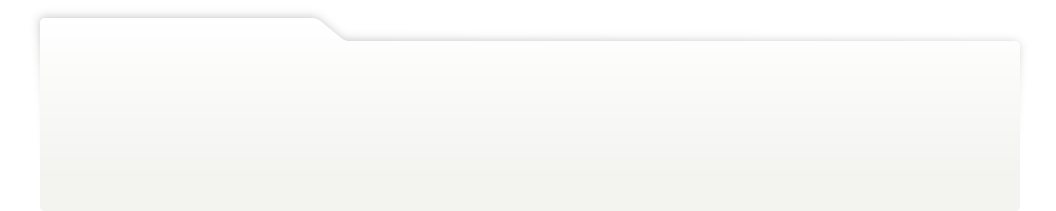
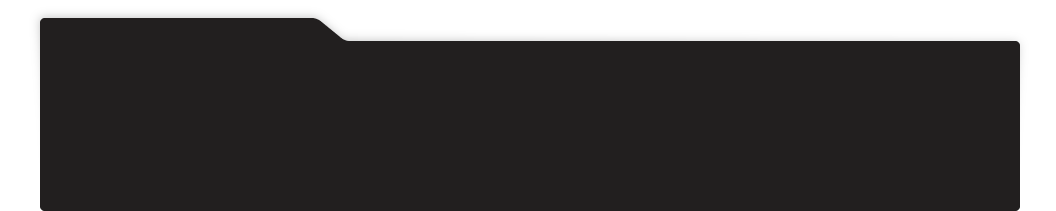
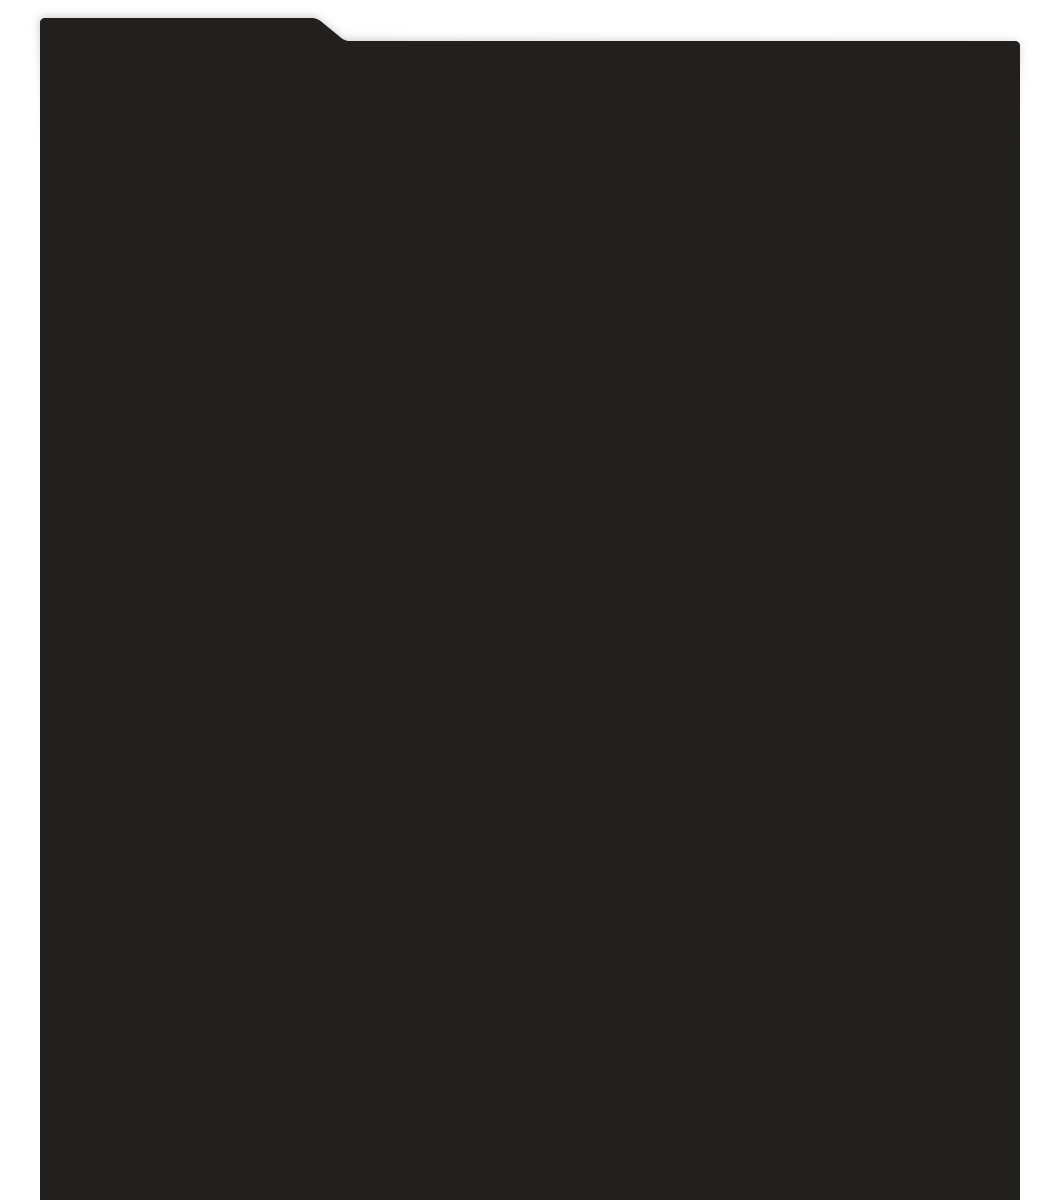
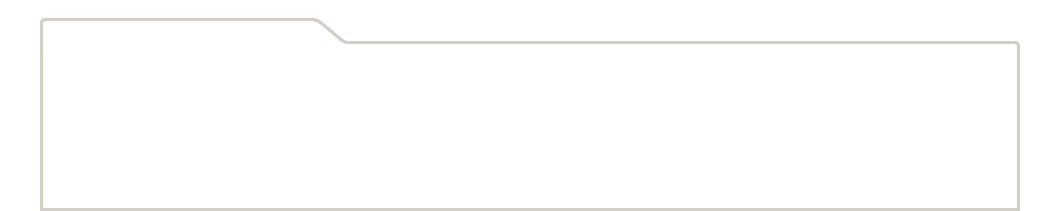
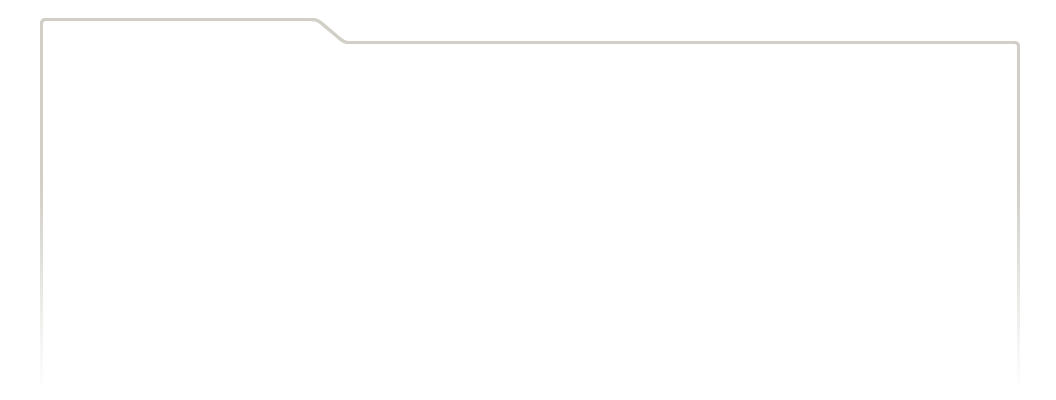
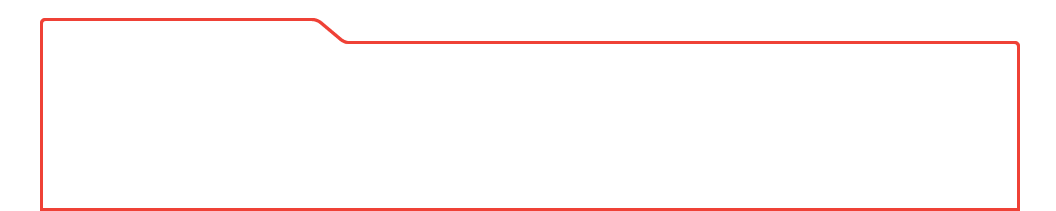
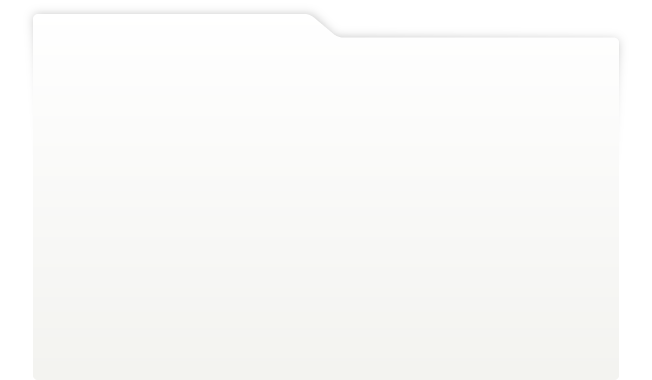
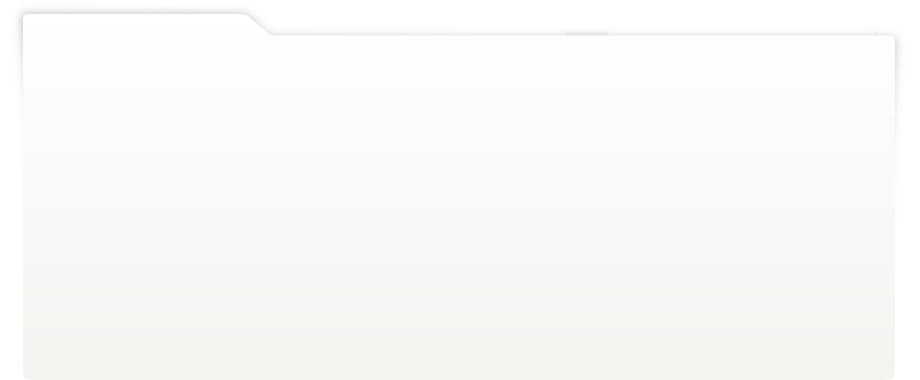
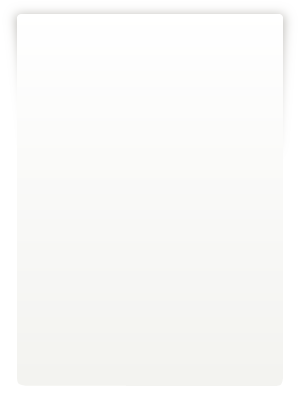
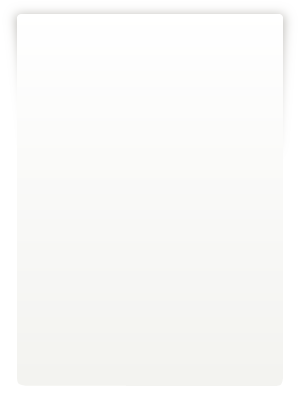
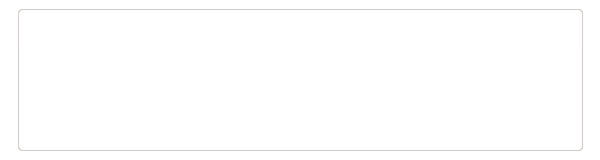
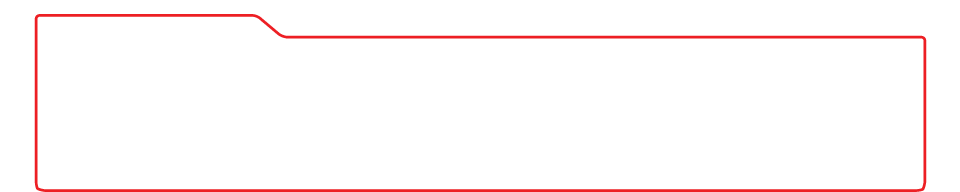
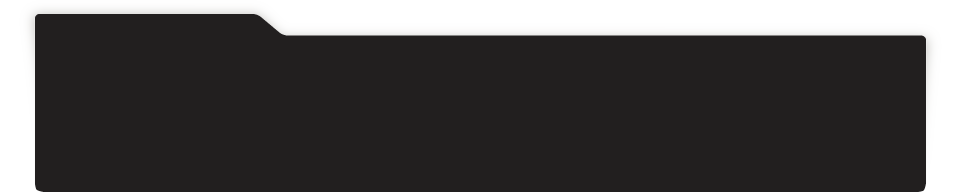
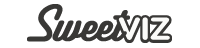
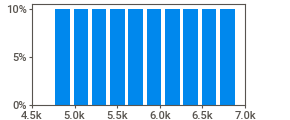
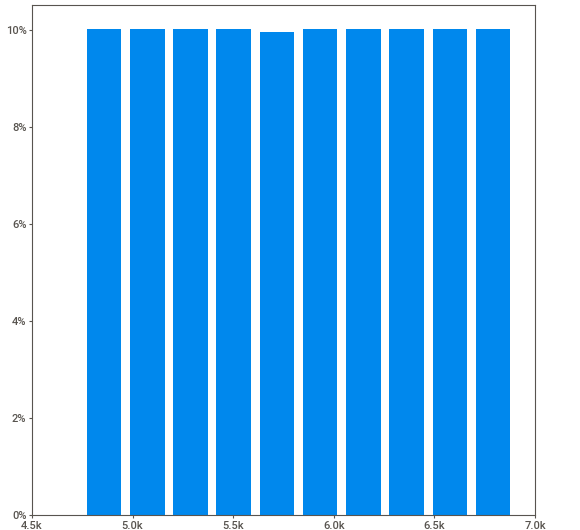
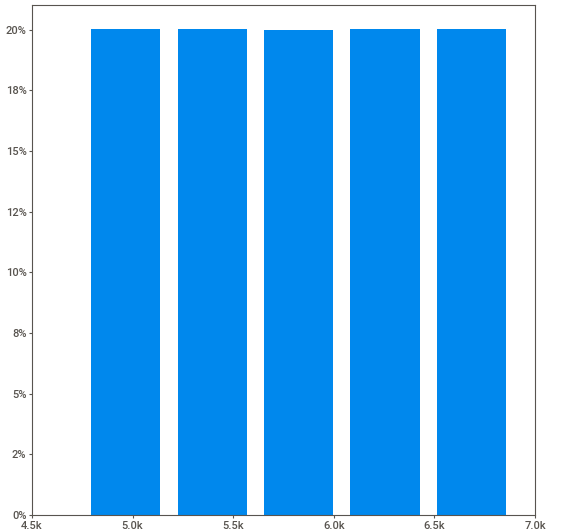
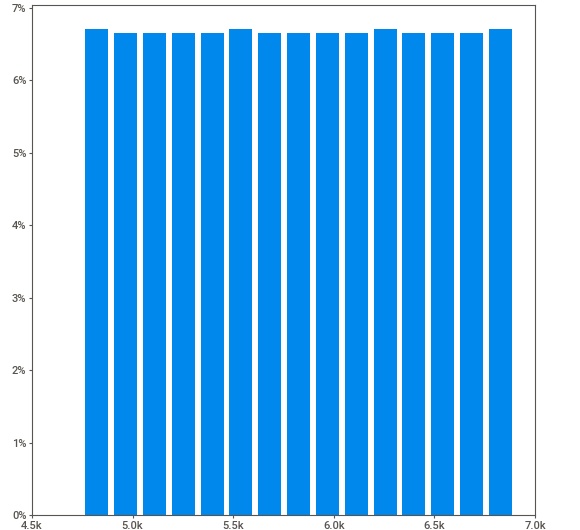
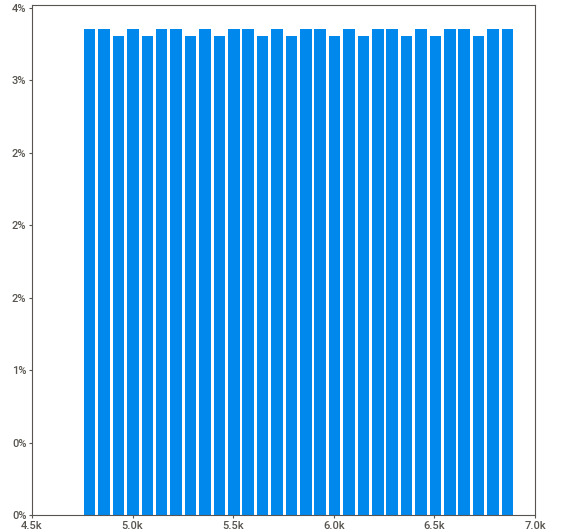
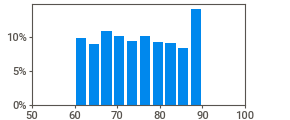
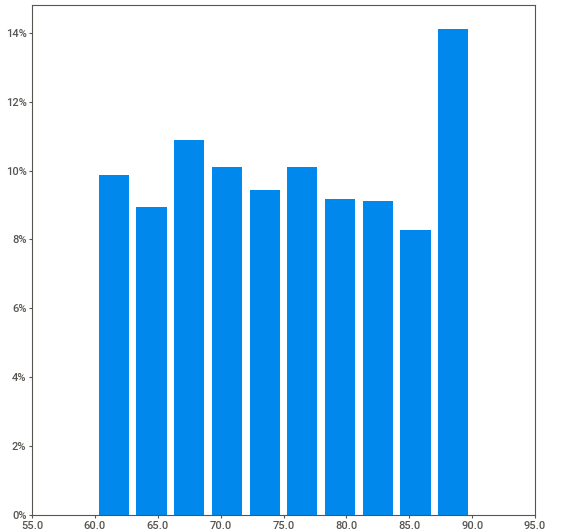
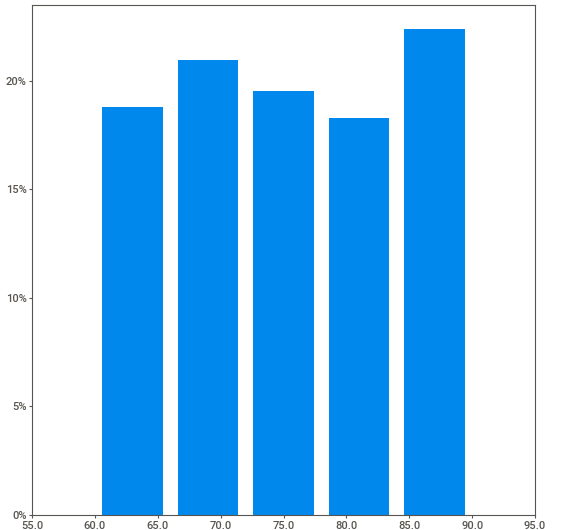
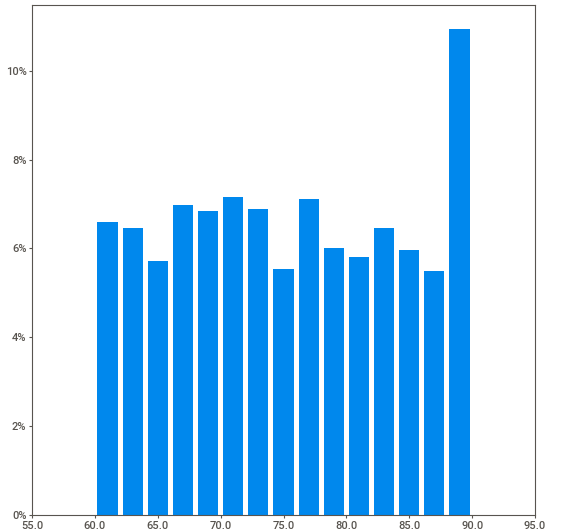
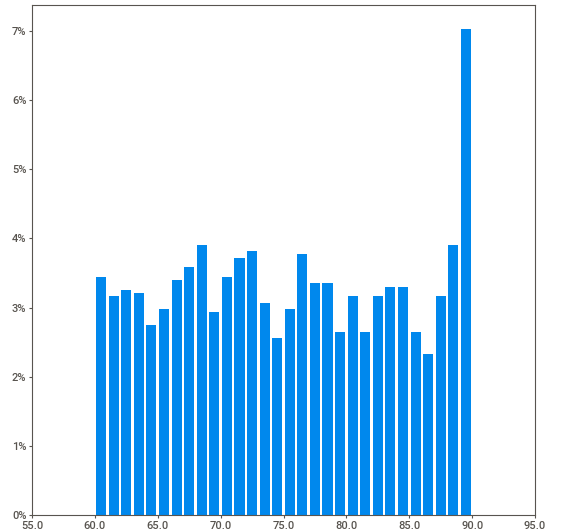
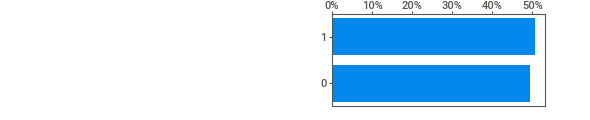
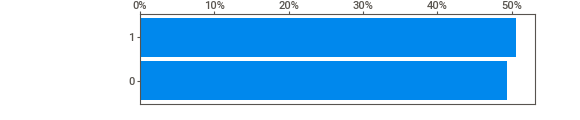
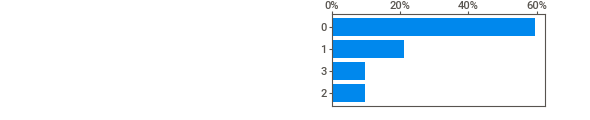
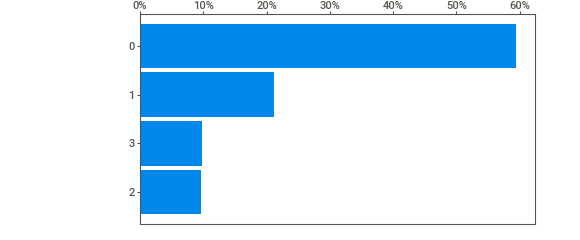
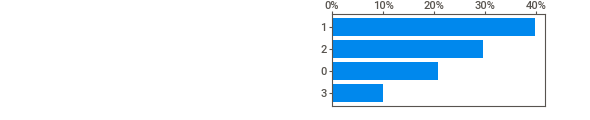
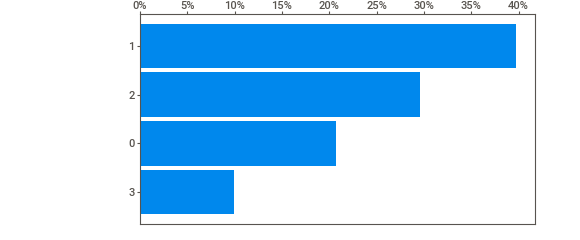
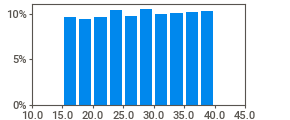
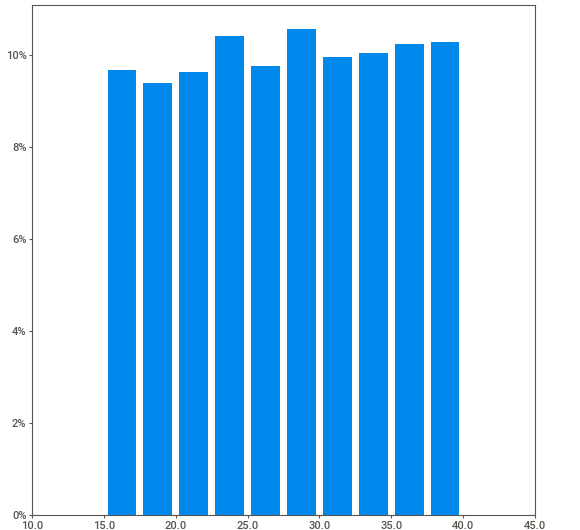
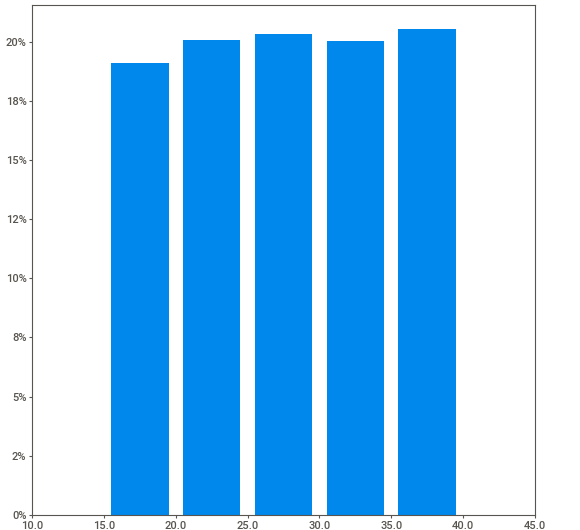
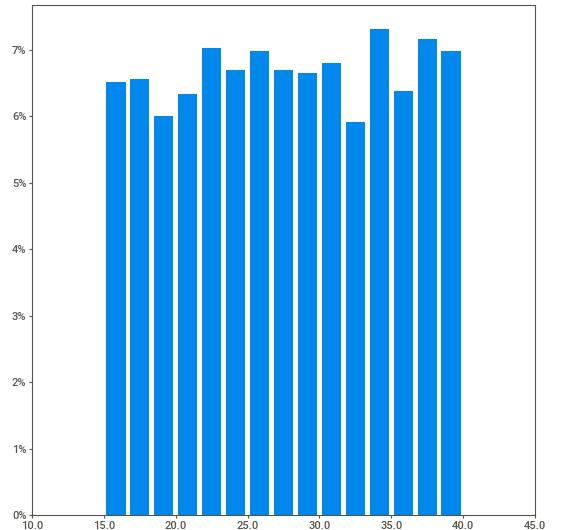
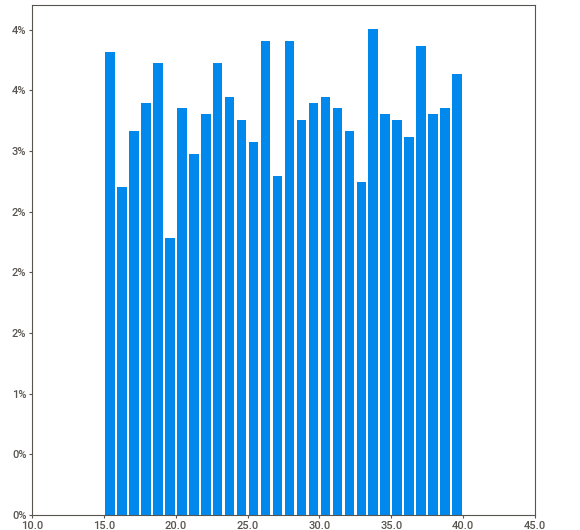
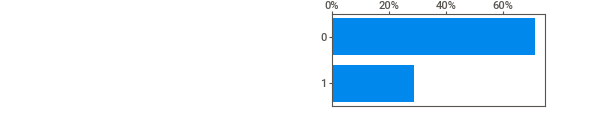
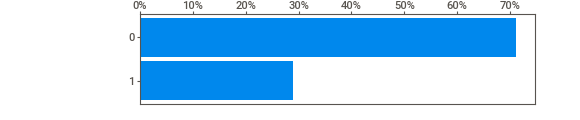
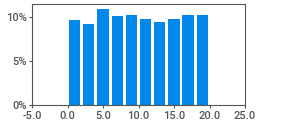
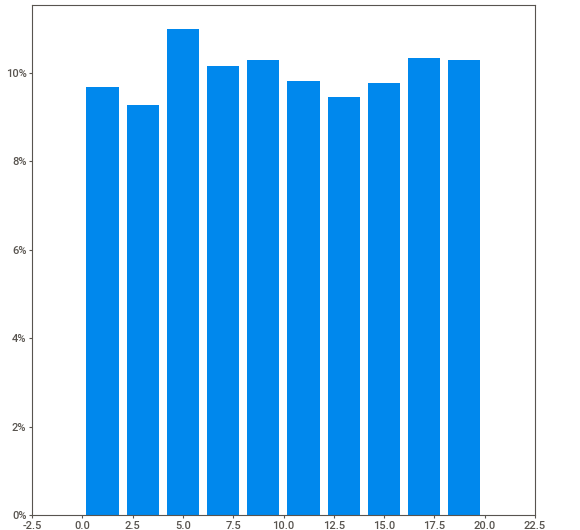
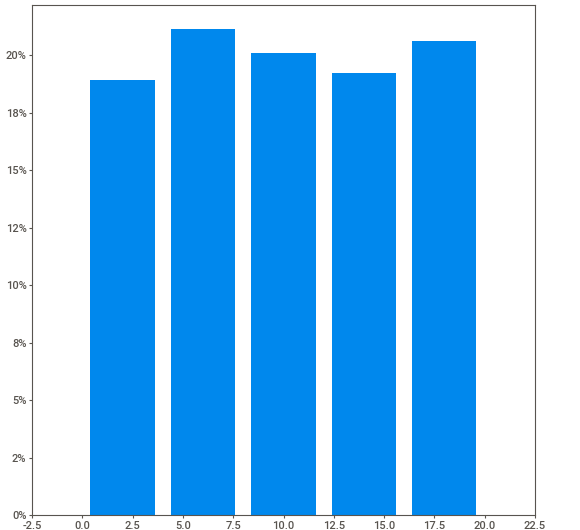
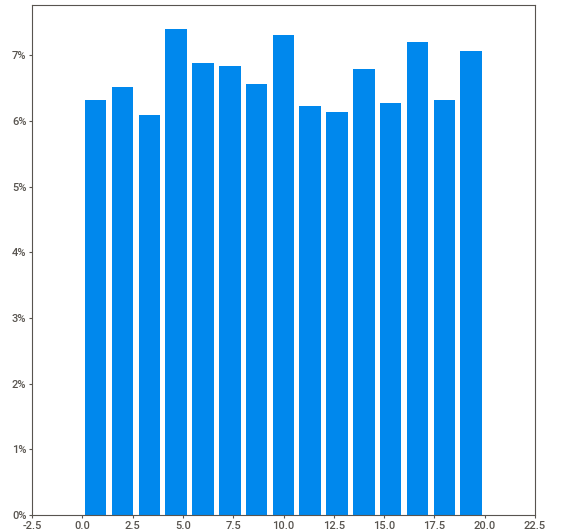
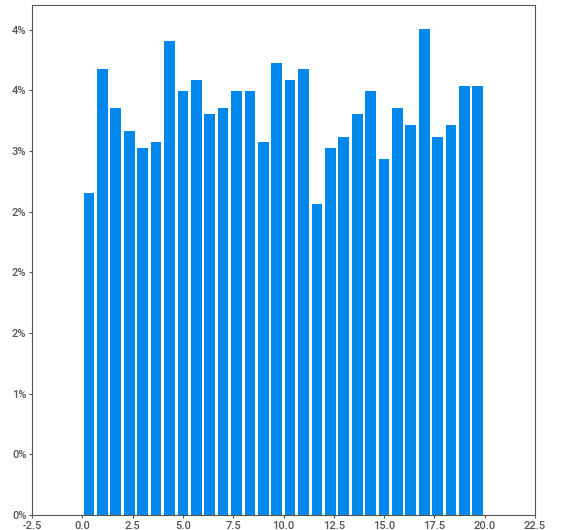
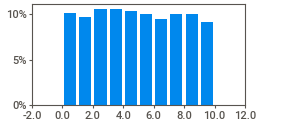
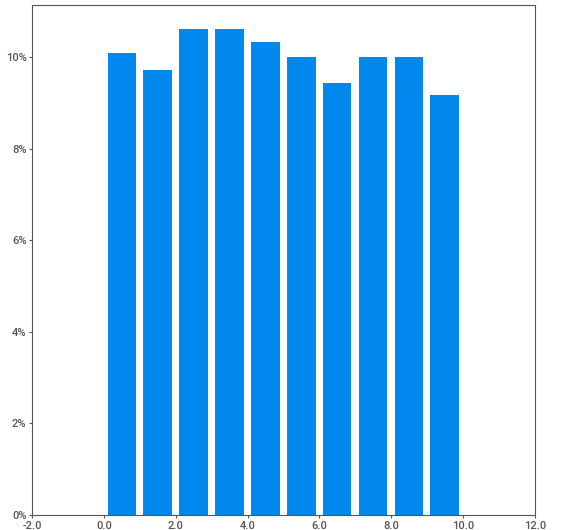
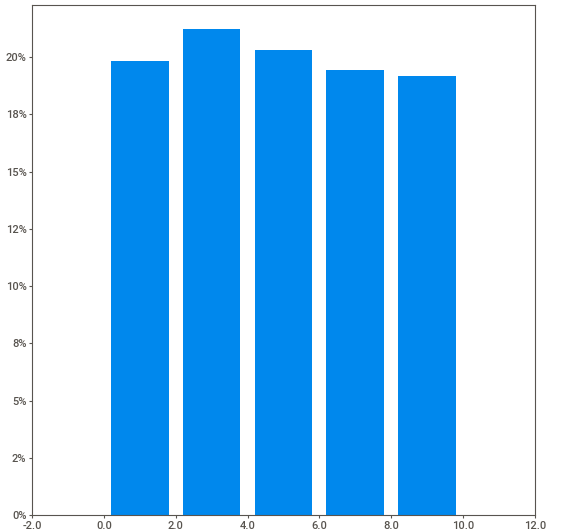
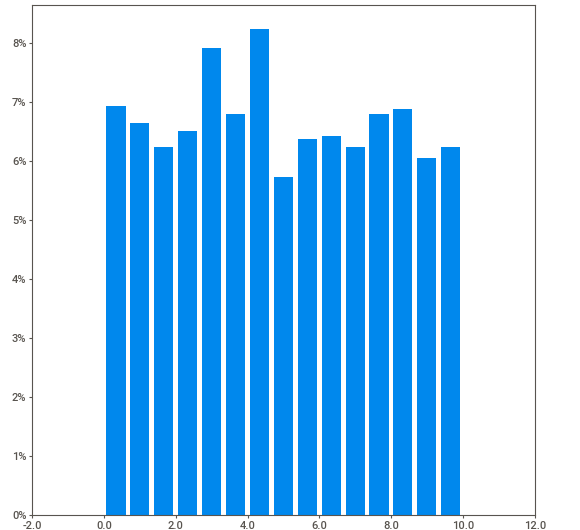
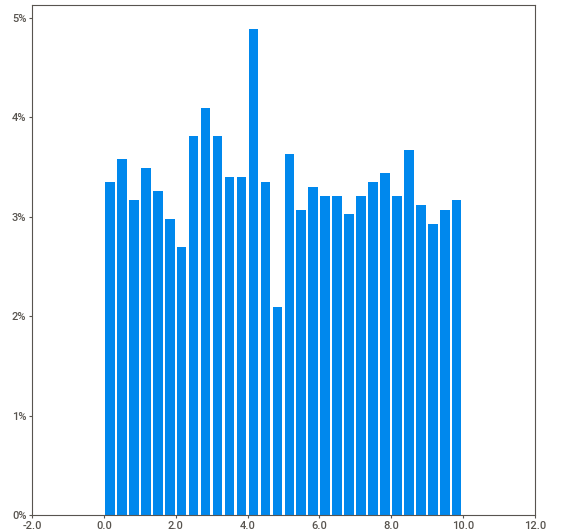
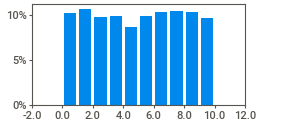
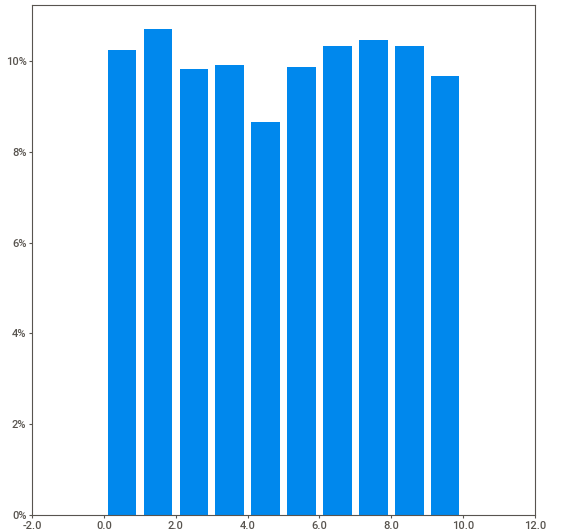
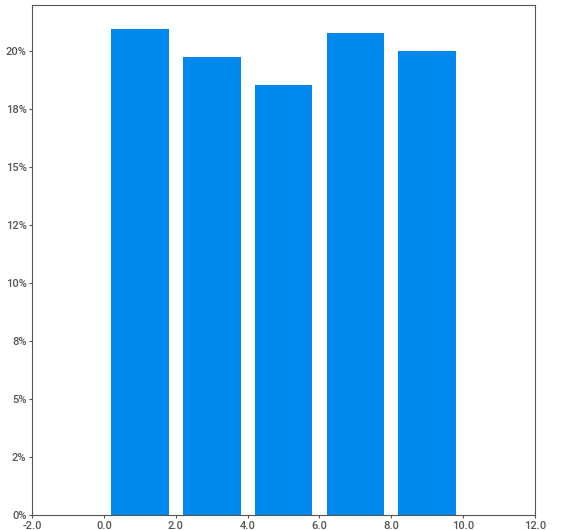
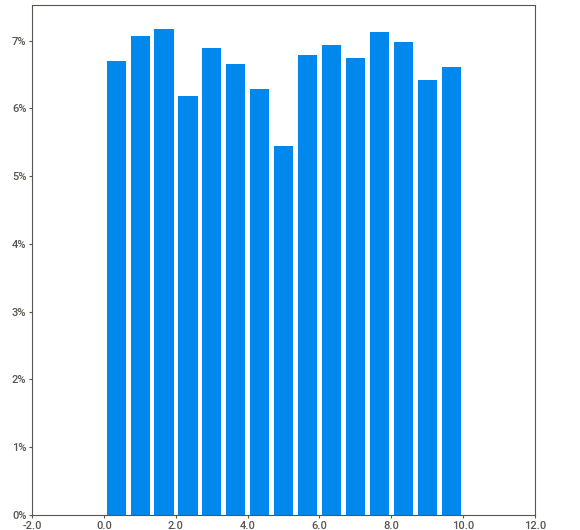
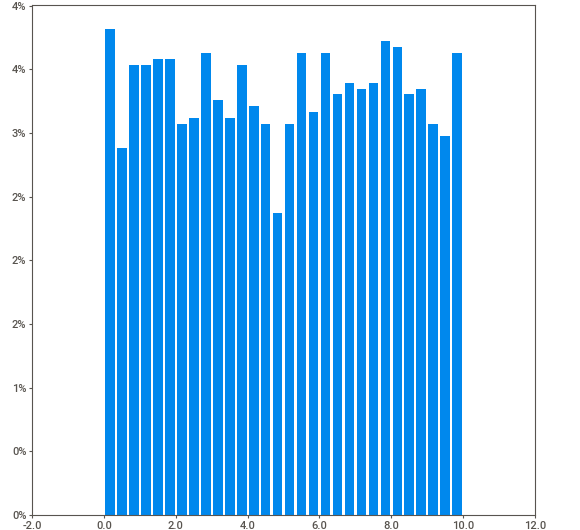
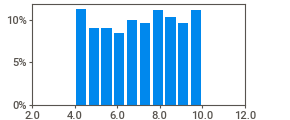
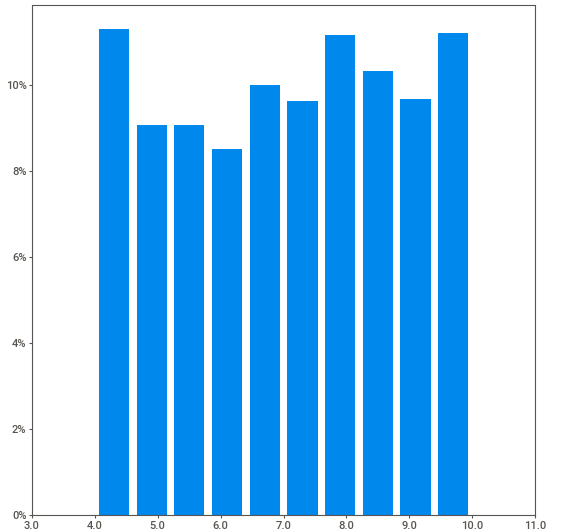
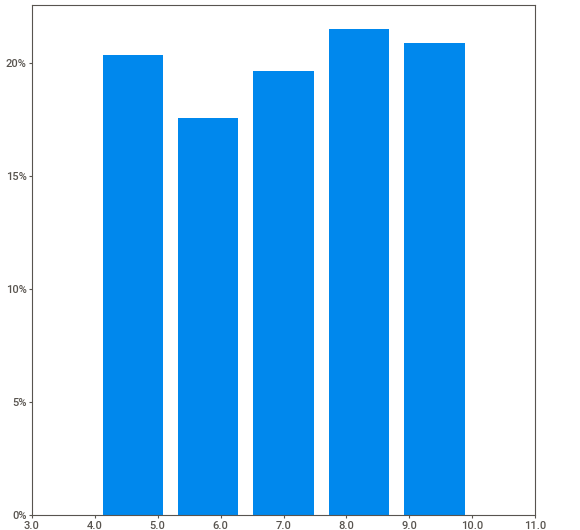
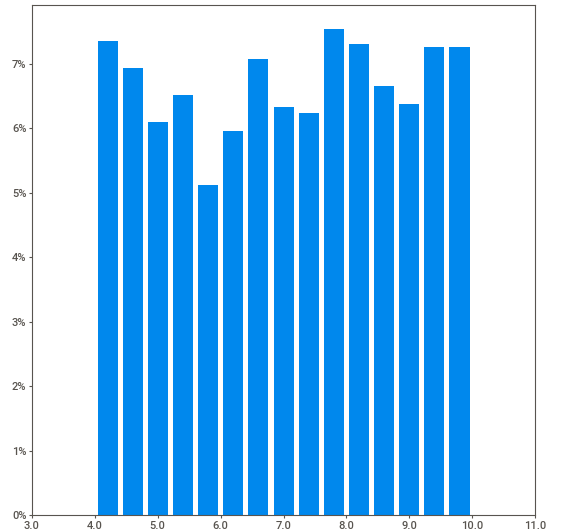
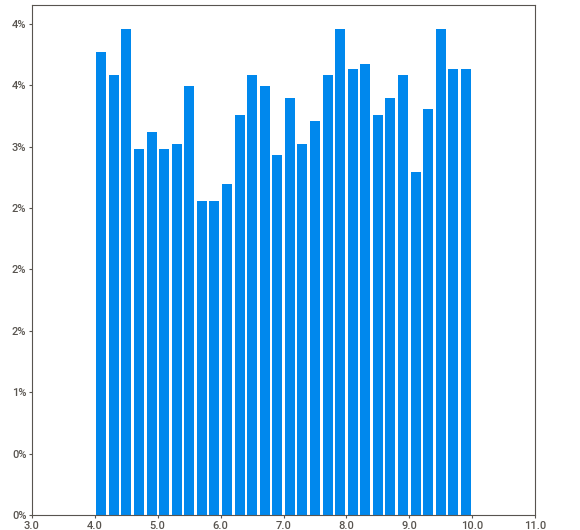
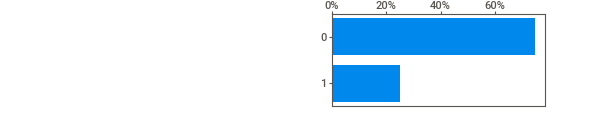
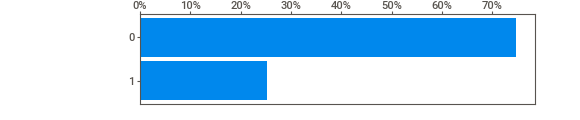
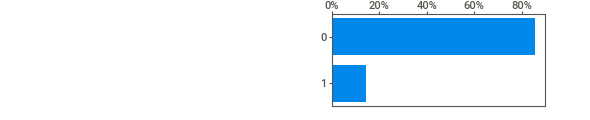
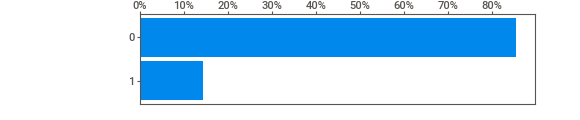
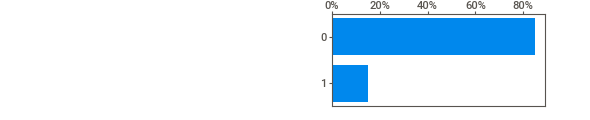
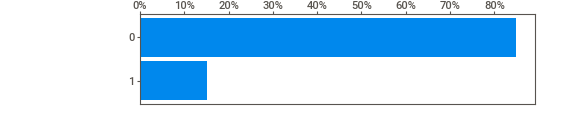
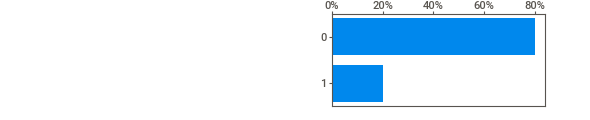
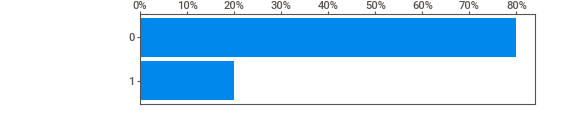
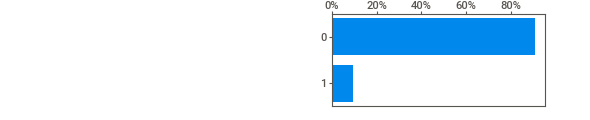
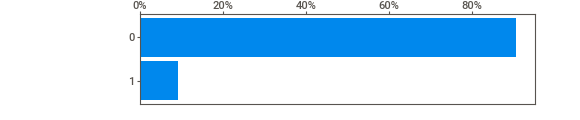
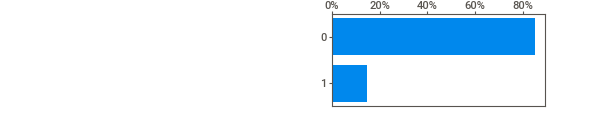
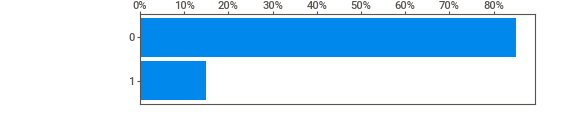
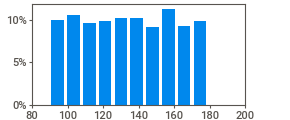
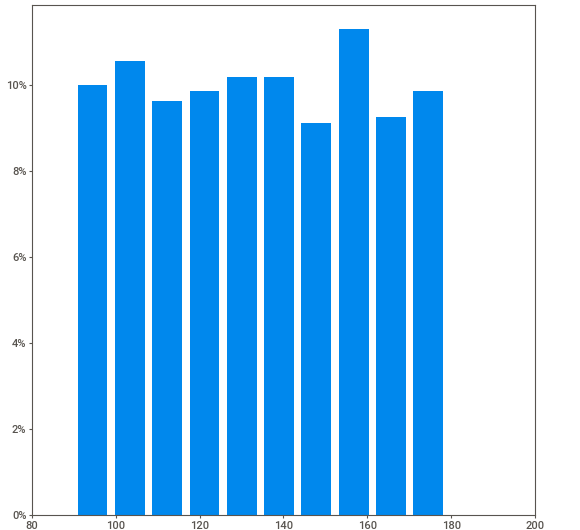
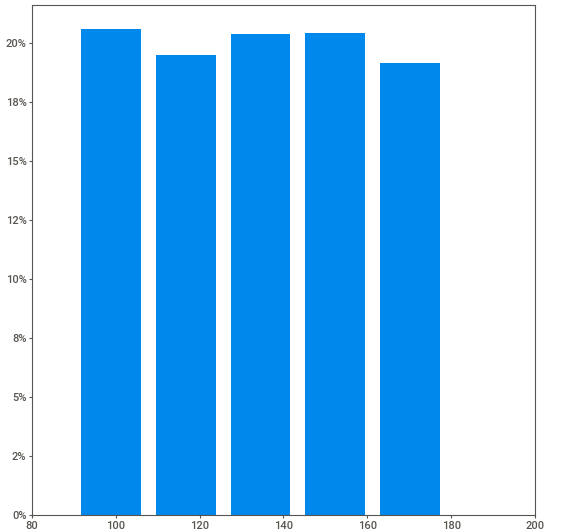
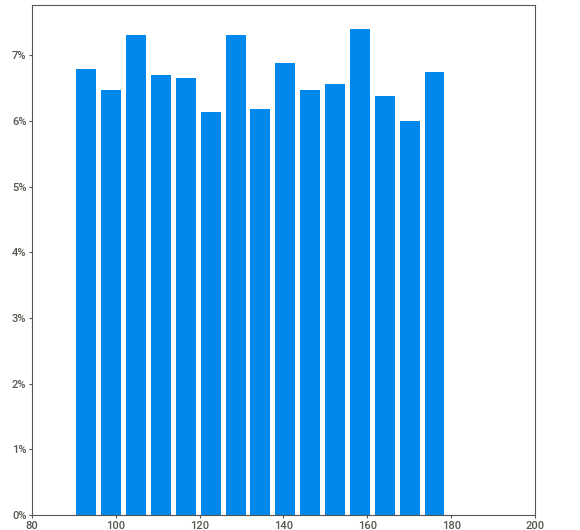
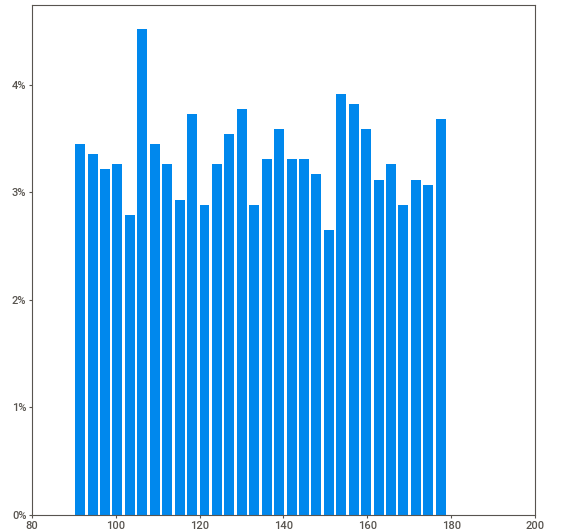
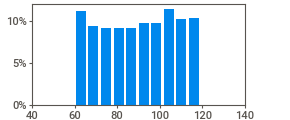
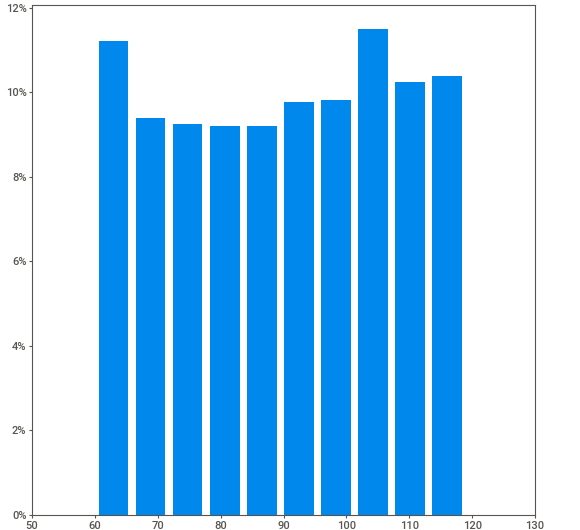
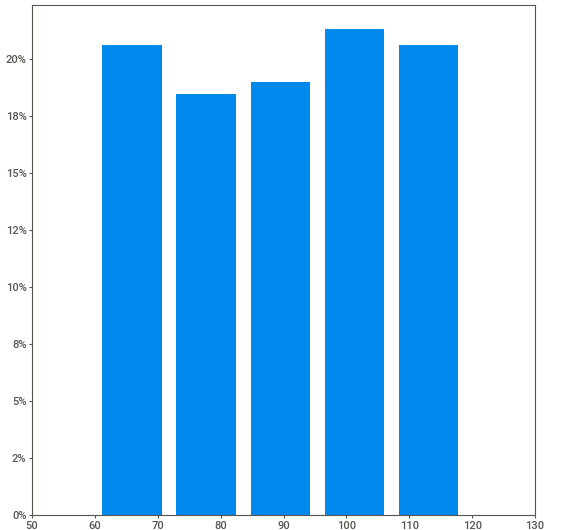
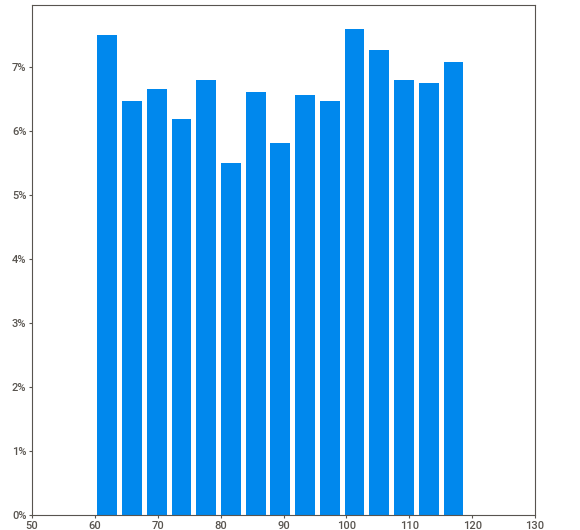
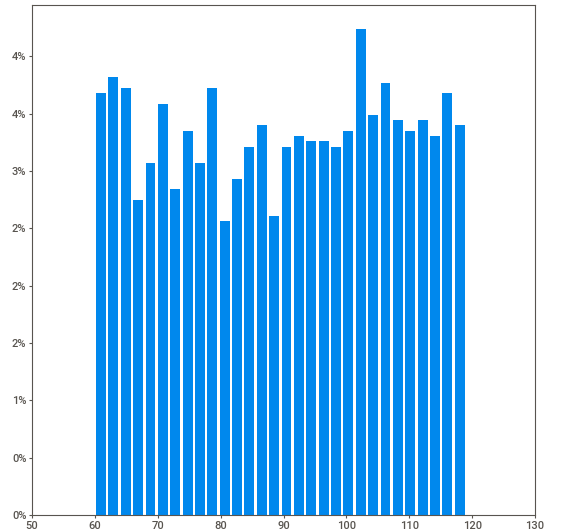
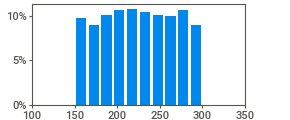
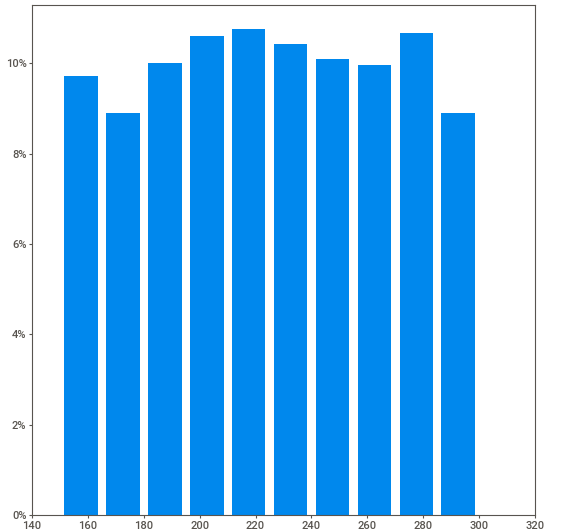
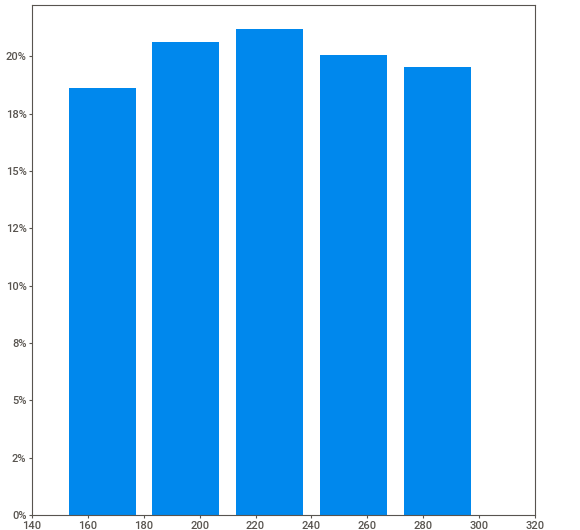
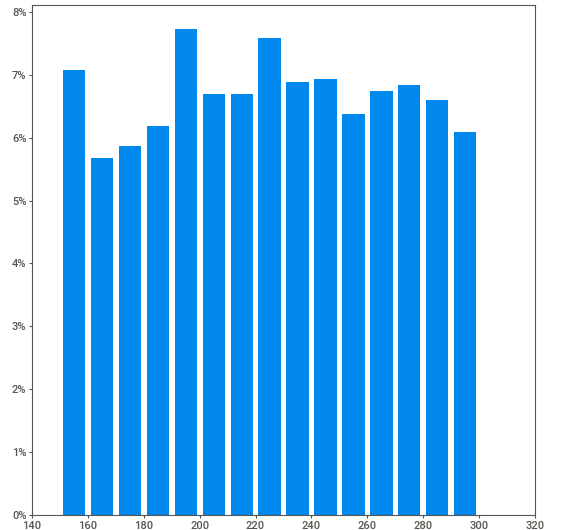
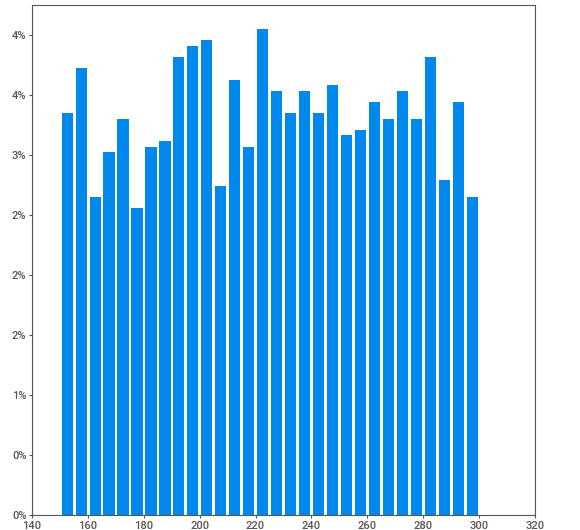
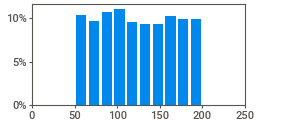
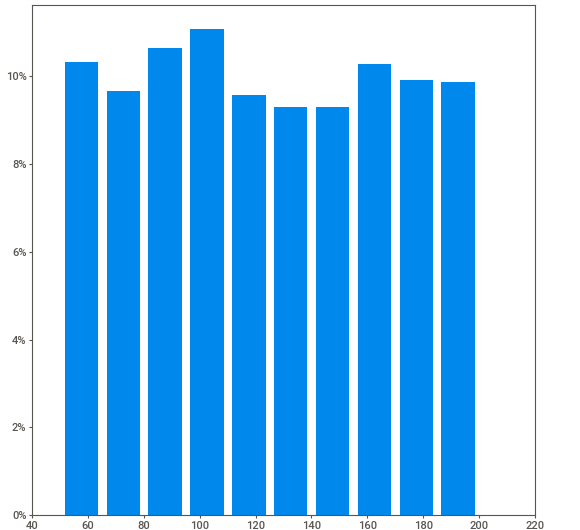
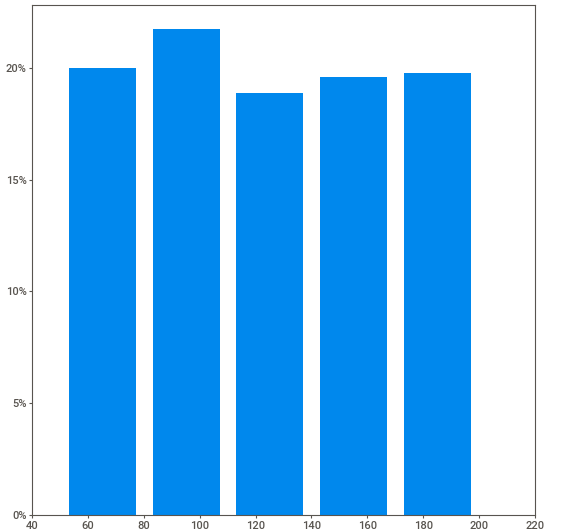
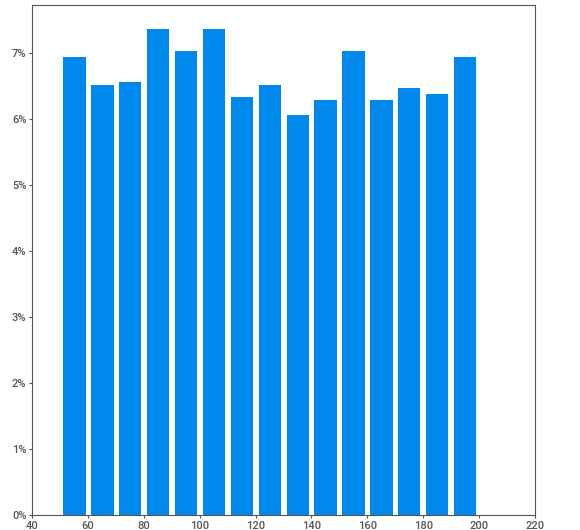
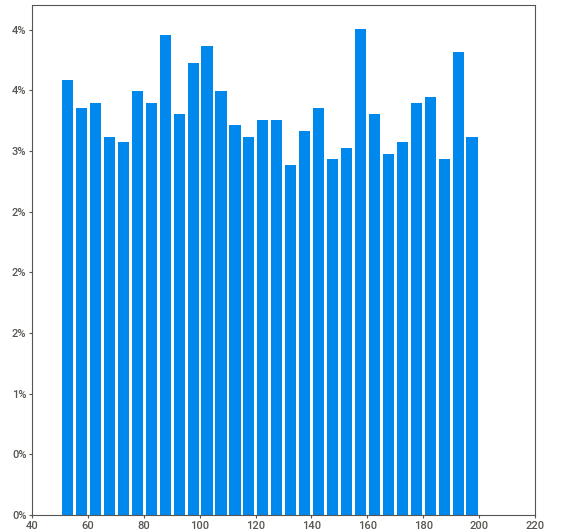
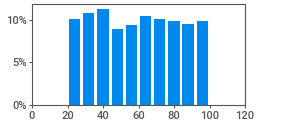
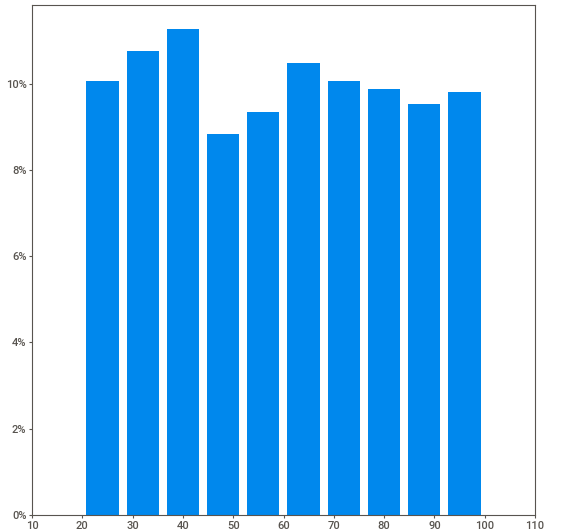
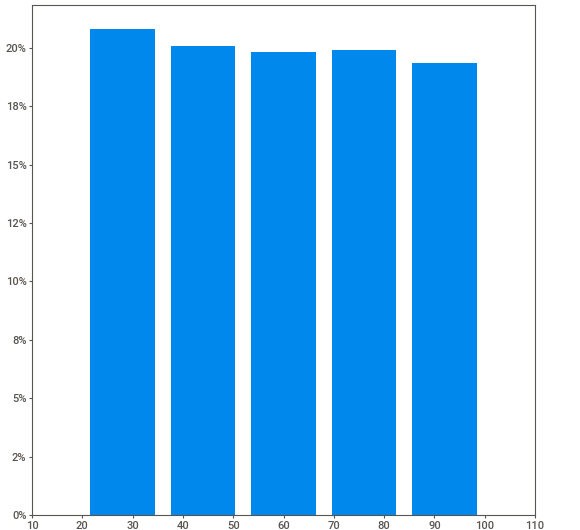
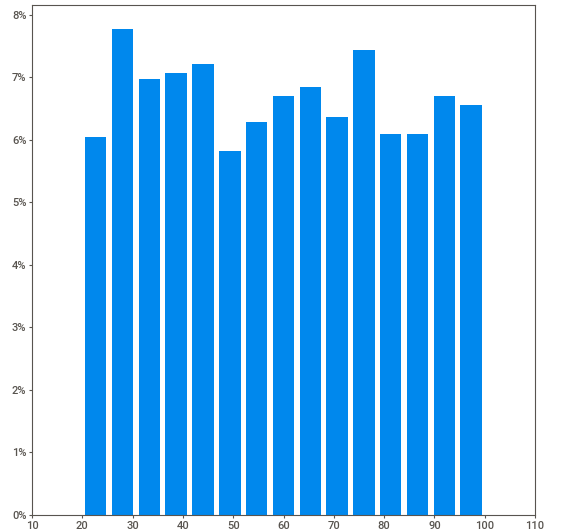
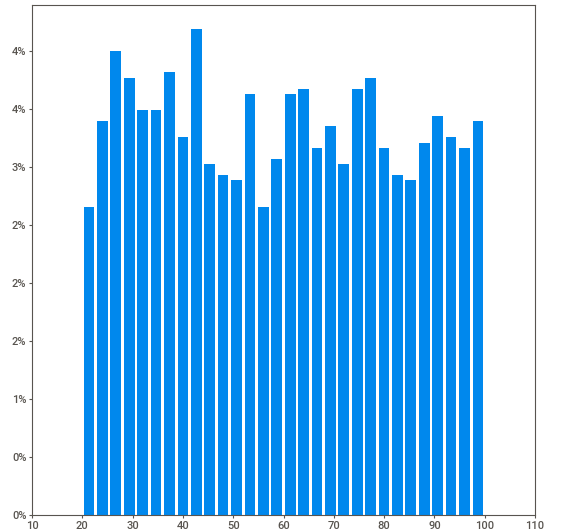
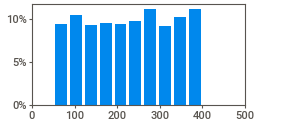
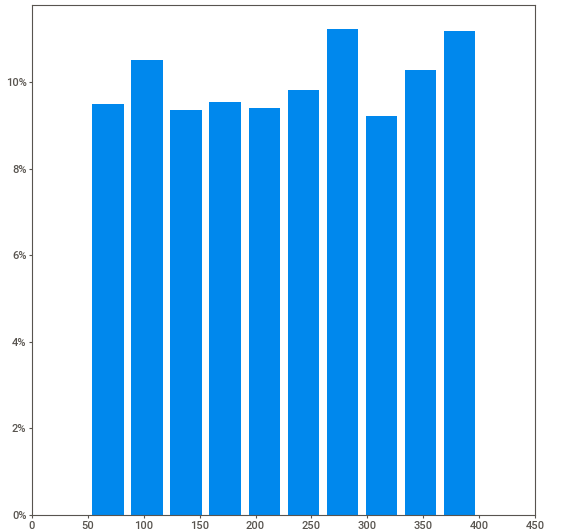
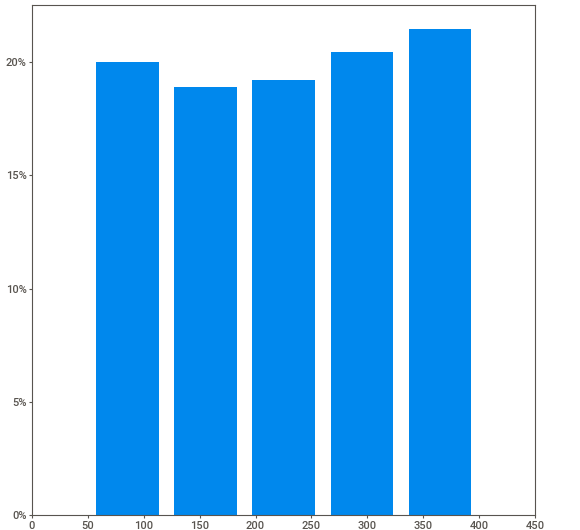
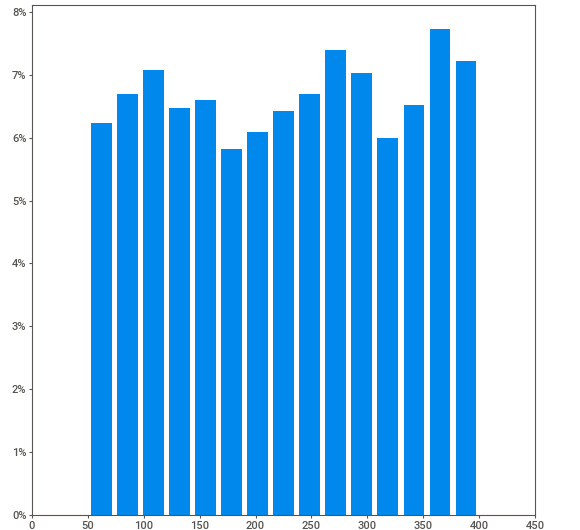
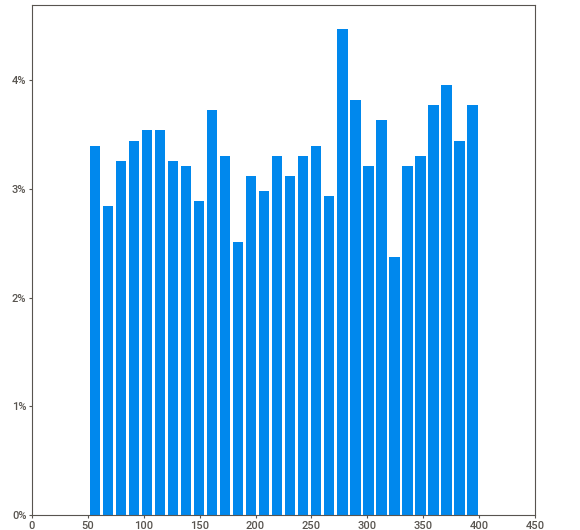
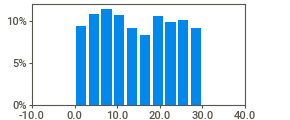
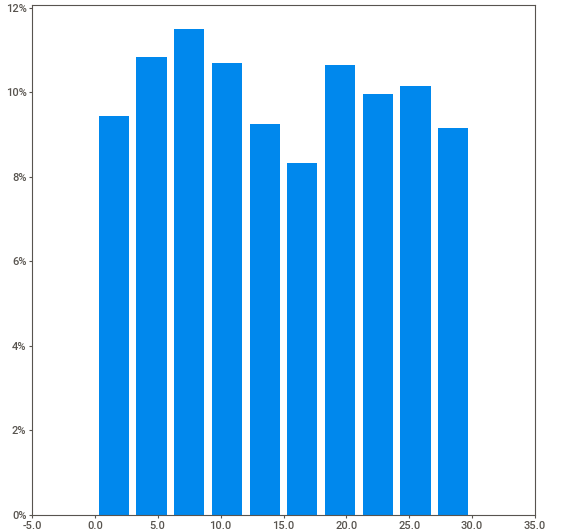
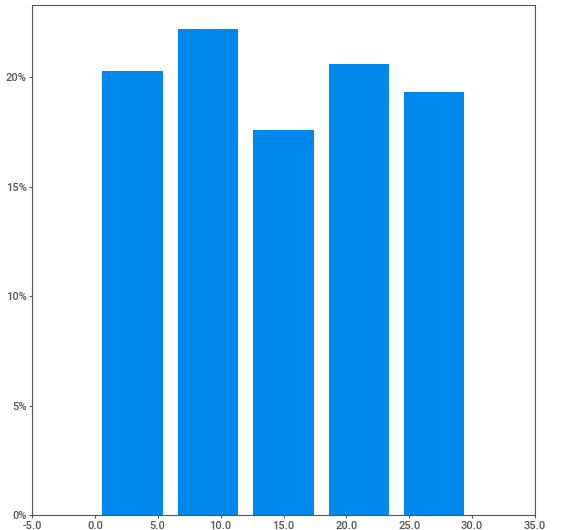
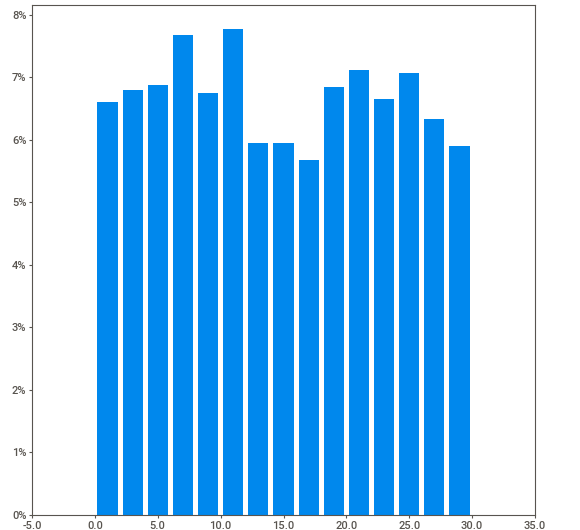
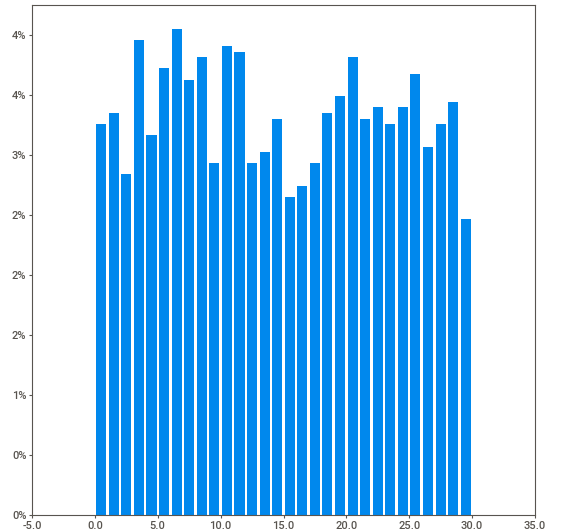
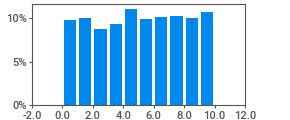
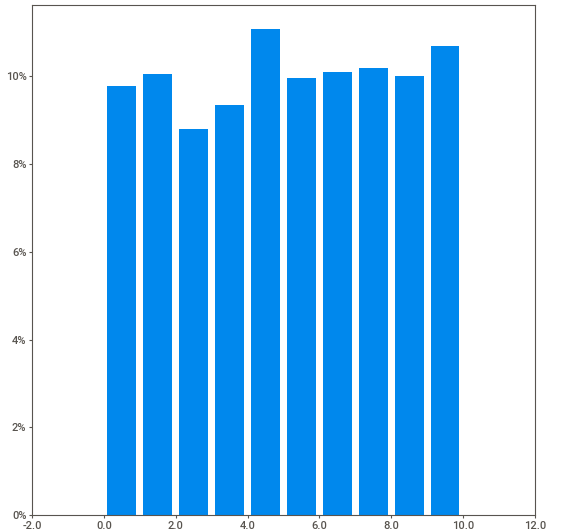
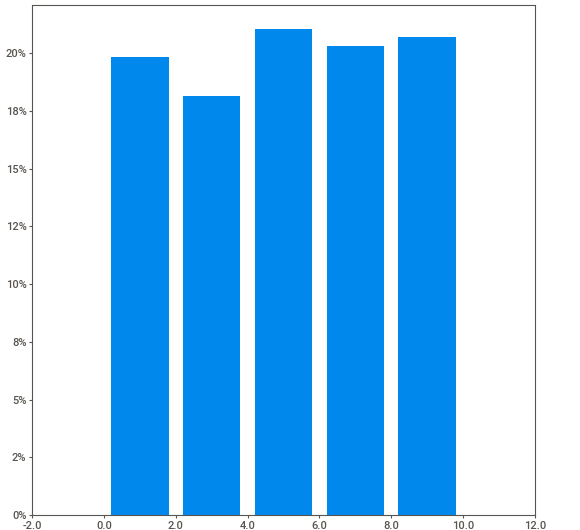
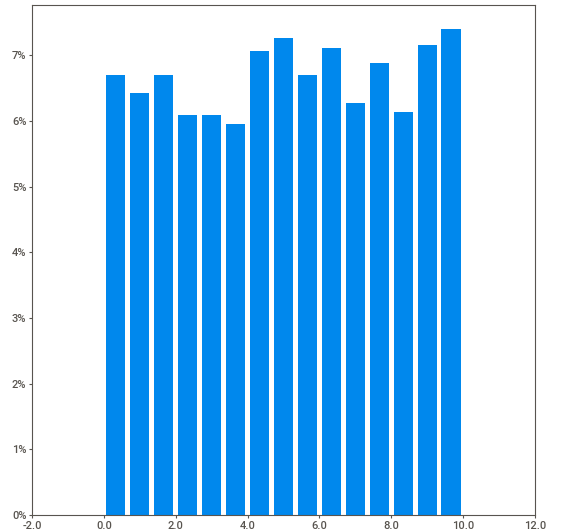
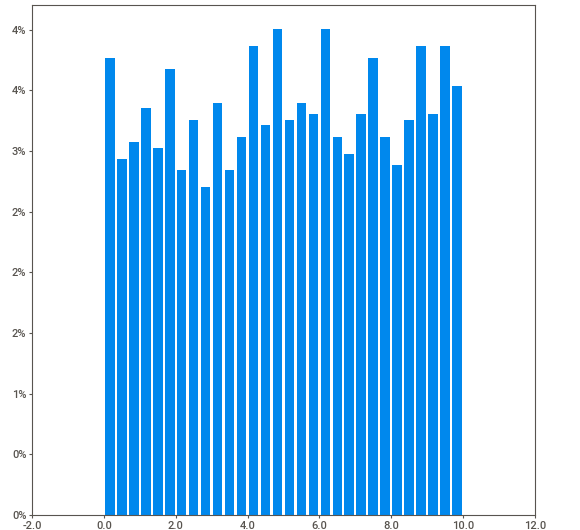
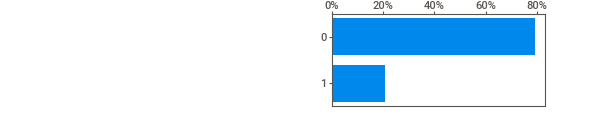
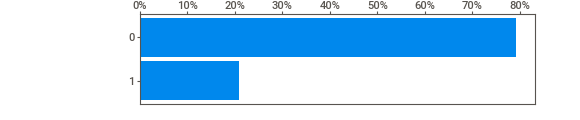
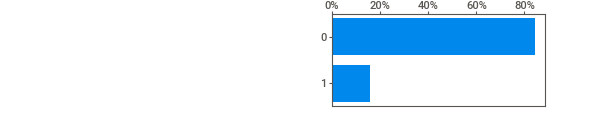
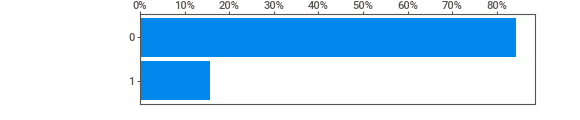
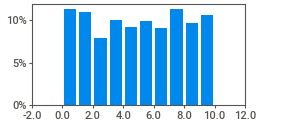
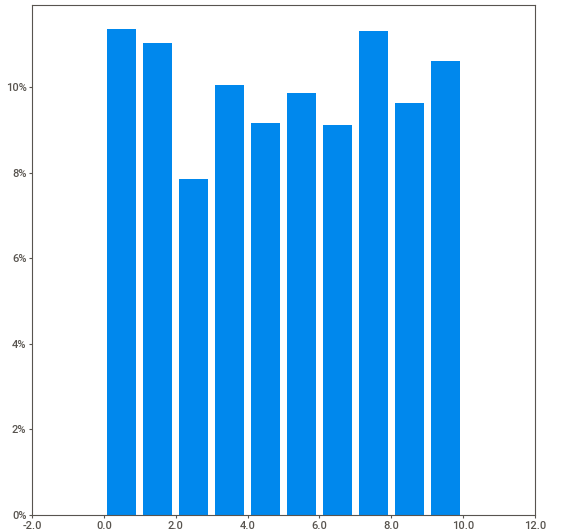
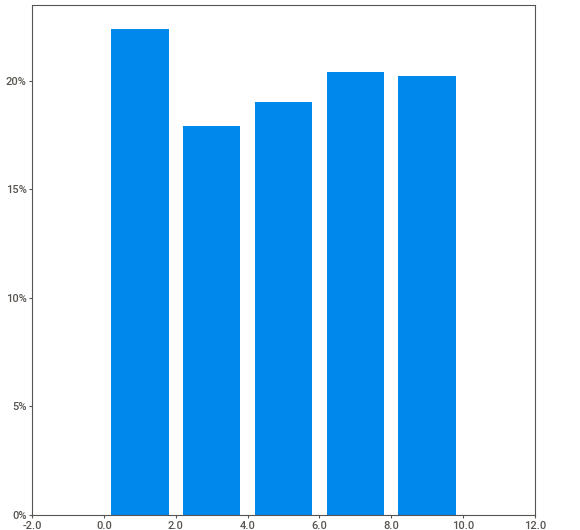
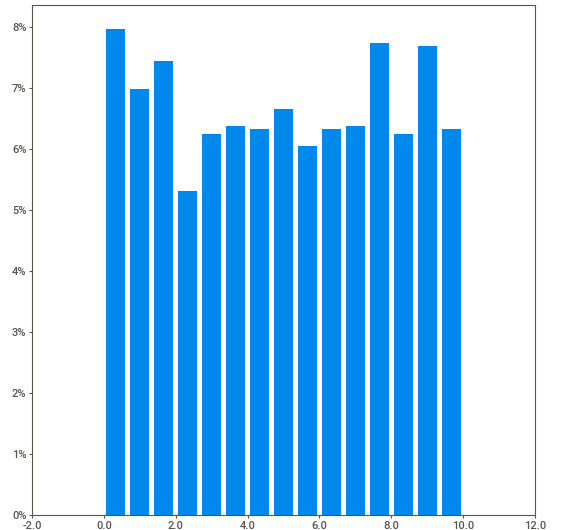
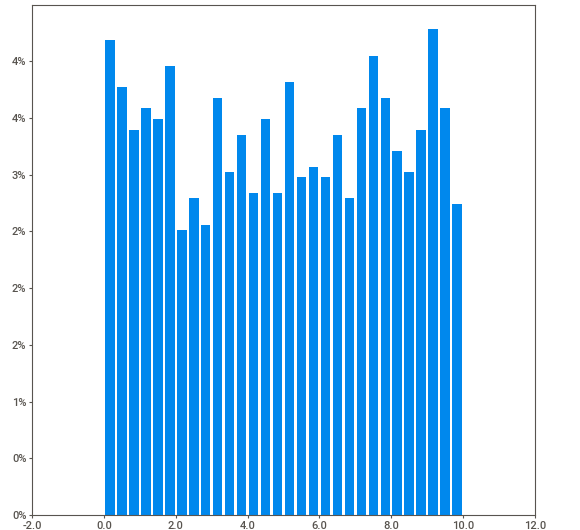
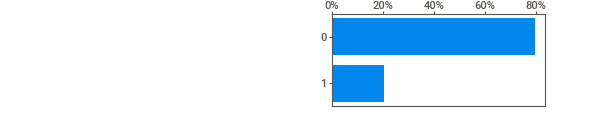
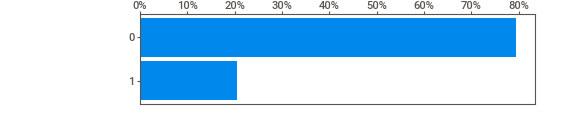
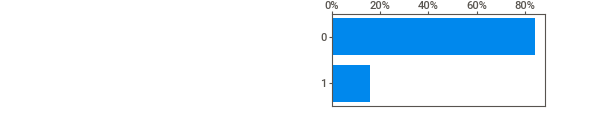
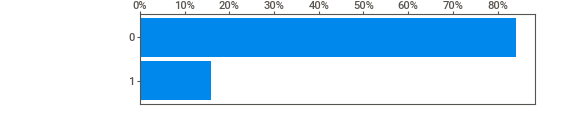
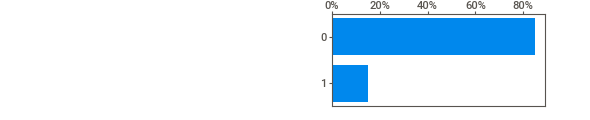
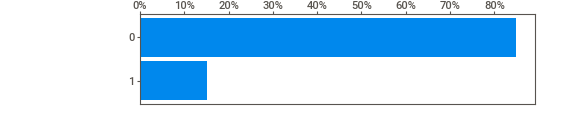
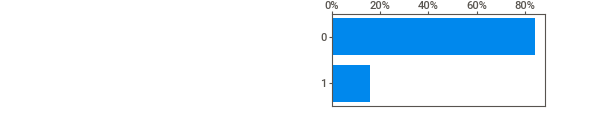
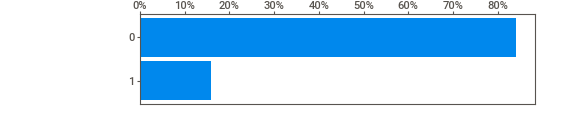
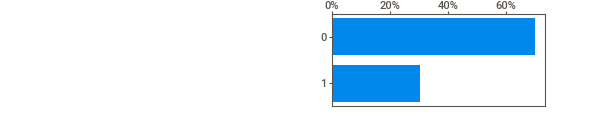
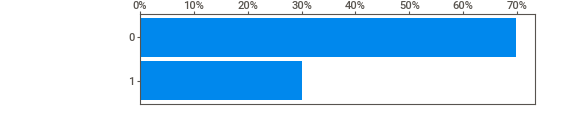
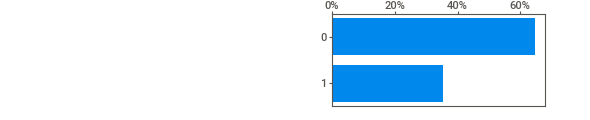
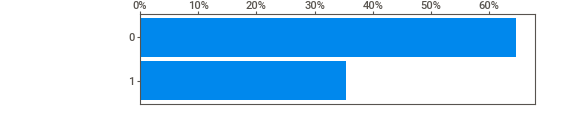
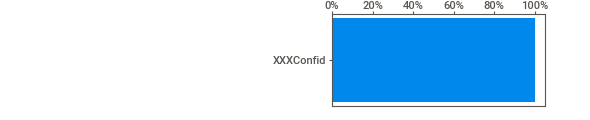
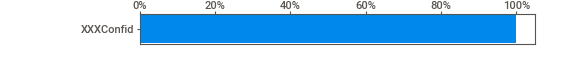
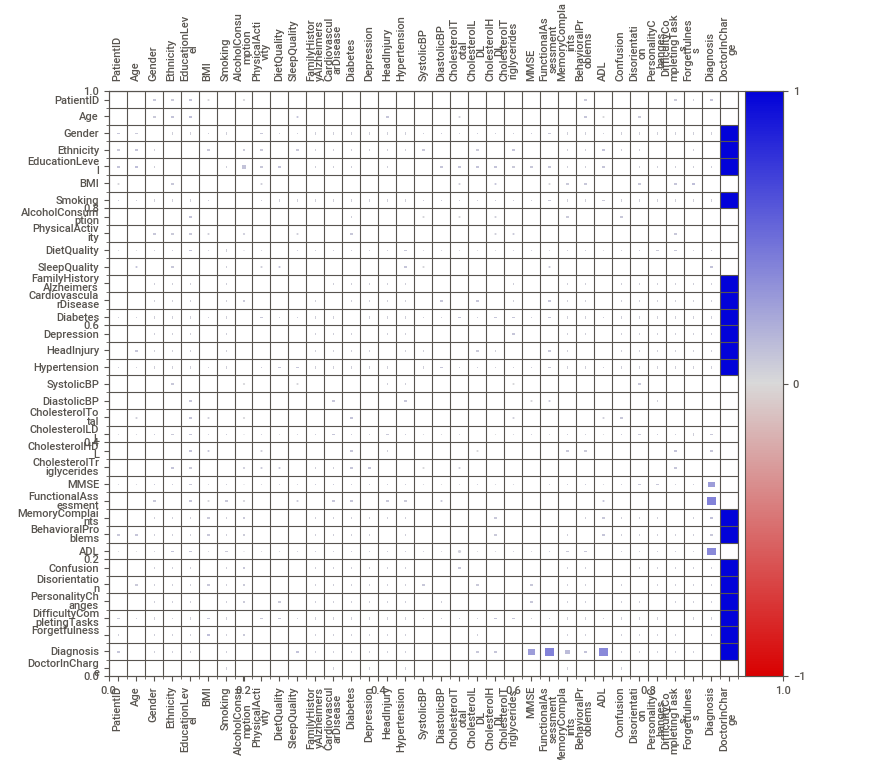
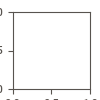

In [5]:
import IPython
from IPython.display import display, HTML
display(HTML("<style>.output_result { max-depth:100% !important; }</style>"))
IPython.display.HTML('analyze.html')

### 4.4 Plot the distribution of numerical features

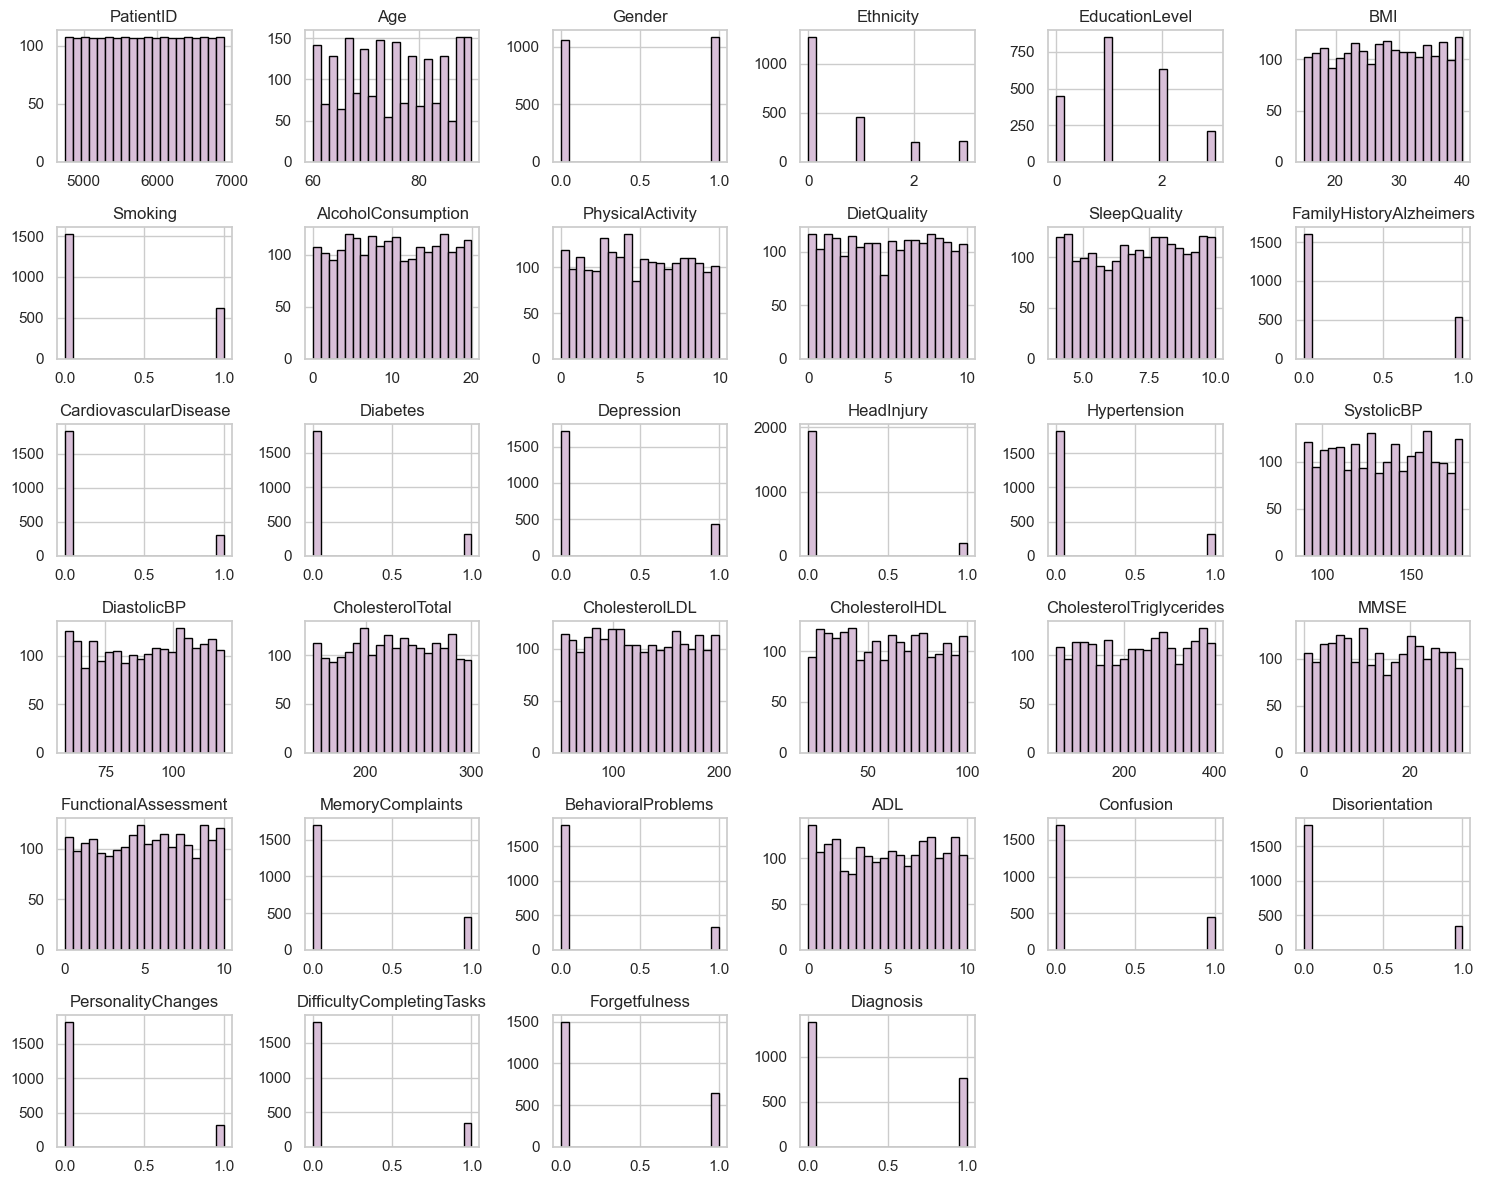

In [6]:
sns.set(style="whitegrid")
df.hist(bins=20, figsize=(15,12), color='thistle', edgecolor='black')
plt.tight_layout()
plt.show()

The insights derived from the histograms provide the following key statistics on the distribution.

•	Functional Assessment Score – range of scores indicates the variability among individuals. This allows the machine-learning model to learn the traces between different levels of functional deficiencies. 

•	MMSE Score – follows a uniform distribution between 10 and 30. This helps build a model that can distinguish between different levels of mental function.

•	Memory Complaints – most individuals do not report memory losses. A niche group with complaints can help the model identify early signs of Alzheimer's by relying on other subtle features.

•	Behavioral Problems – reported occurances are relatively rare in the dataset, indicating that need to focus on other more prevalent features in predicting the disease. 

Overall, the distribution and variability of features explain a comprehensive and diverse dataset. This could in turn develop a predictive model with high accuracy level.


### 4.5 Identifying key features help with the Diagnosis

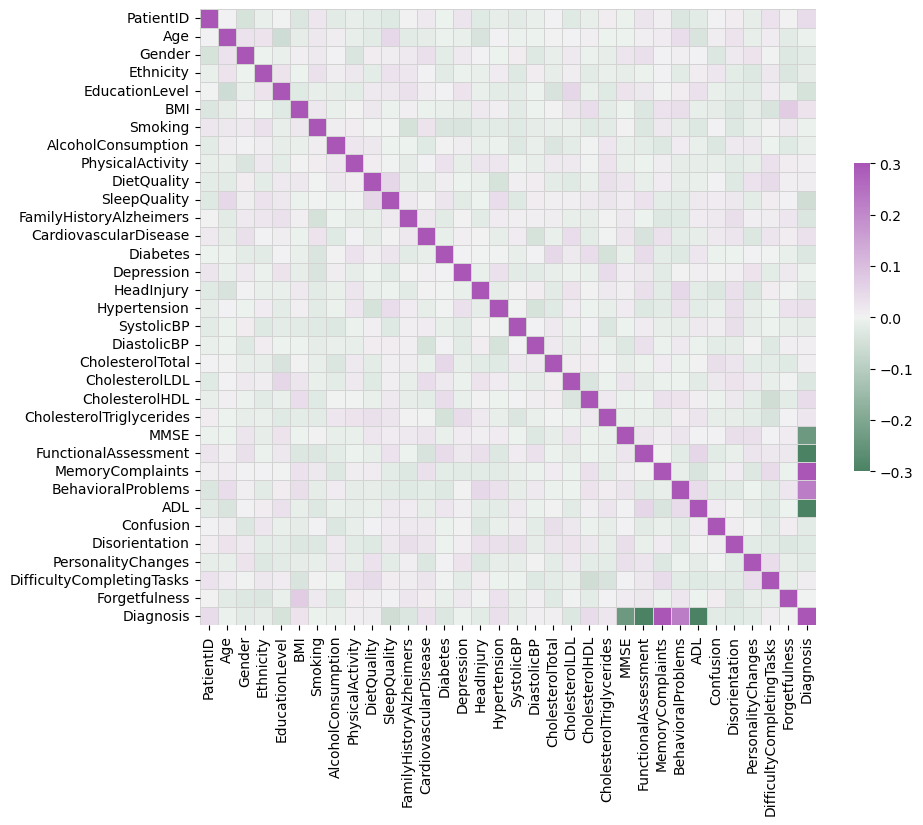

In [10]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-.3, vmax=.3, center=0, square=True, 
            linewidths=.5, linecolor='lightgrey', cbar_kws={"shrink": .5})
plt.show()

#### Key takeaways from the correlation matrix that help with the diagnosis.
The colour intensity indicates the strength  and direction of the correlations between pairs of variables.

##### Notable Positive Correlations
* ADL - Activities of Daily Living Score & Functional Asssessment Score:
  
  The dark greenish sqaures represnts a stronger correlation  between these variables.
  
  Consistent monitoring of these metrics can identify early cognitive decline, which could progress to Alzheimer's.
    
* Memory Complaints & MMSE - Mini-Mental State Examination Score:
  
  Mild correlation is present indicated by darker shades.
  
  By promoting individuals to report any memory concerns can also help with early diagnosis.
  
* Behavioral Problems:
  
  It is recommended to observe changes in behaviour given the positive correlation.
  
  Early identification can lead to further evaluation and intervention.

##### Notable Negative Correlations
Negative correlated variabled such as education level, BMI & sleep quality act as protective measures
against risk of the disease.

Many cells with very light shades or almost white represents weak or no correlation.



### 4.6 Univariate Analysis

* Age Distribution

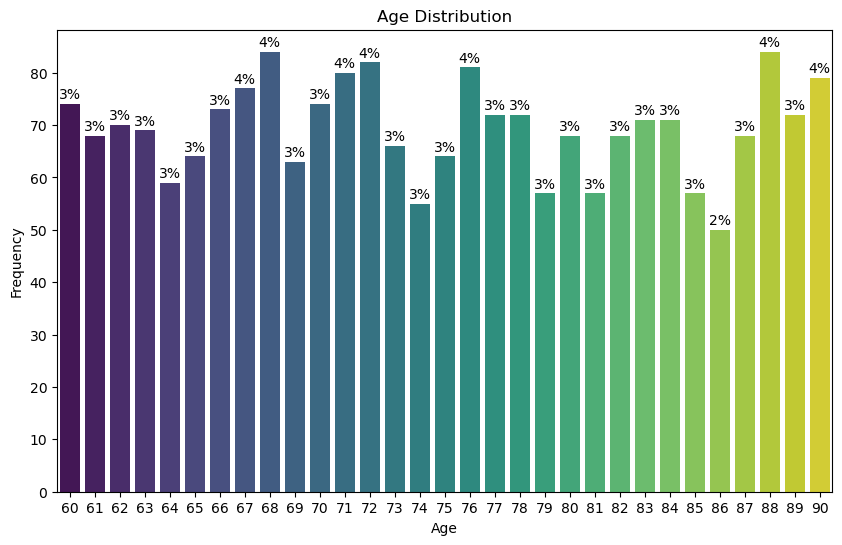

In [12]:
# Sorting and counting the ages
df = df.sort_values(by='Age')
age_counts = df['Age'].value_counts()
age_counts = age_counts.sort_index()

# Calculate the percentage for each age
total_count = age_counts.sum()
age_percentages = (age_counts / total_count) * 100

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

# Adding percentages on top of each bar
for i, percentage in enumerate(age_percentages):
    ax.text(i, age_counts.values[i] + 1, f'{percentage:.0f}%', ha='center')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

#### From Age Distribution barplot we can observe below facts.
* Age distribution range from 60 to 90 years.
* The distribution shows a fairly uniform spread across the age range, with slight peaks at ages 74-76 and 89-90.
* This suggests that the dataset has a consistent representation of individuals in this age group, with few significant outliers.

* Gender Distribution

In [4]:
gender_counts = df['Gender'].value_counts()
total = len(df)
percentages = (gender_counts / total * 100).values

In [5]:
# Gender: where 0 represents Male and 1 represents Female.
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
gender_counts = df['Gender'].value_counts()

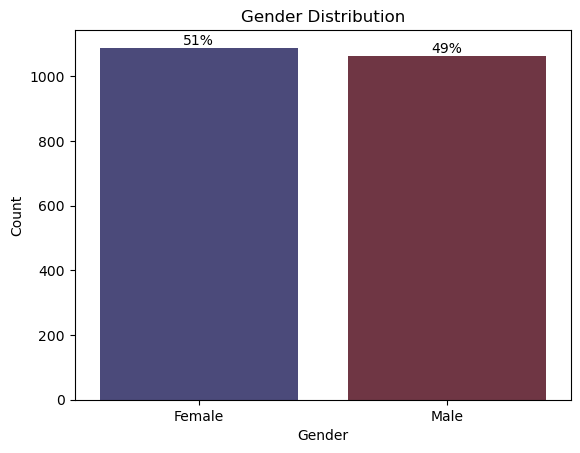

In [6]:
sns.barplot(x=gender_counts.index,
            y=gender_counts.values,
            palette="icefire")
for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 1, f'{percentages[i]:.0f}%', ha='center', va='bottom')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

#### Observations from Gender distribution barplot.
* Both genders are equally distributed in general.
* Female representation is 2% higher than Male.

* Diagnosed cases by Ethnicity Groups

   - This step help us to evaluate whether a certain ethnic group is prone to Alzheimer's.

In [6]:
# Mapping the ethnicity groups
df['Ethnicity'] = df['Ethnicity'].map({
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
})

In [8]:
# Filter the diagnosed cases
diagnosed_df = df[df['Diagnosis'] == 1]

In [8]:
# Count the number of diagnosed cases per ethnic group
diagnosed_counts = diagnosed_df['Ethnicity'].value_counts()

# Calculate percentage
diagnosed_percentage = diagnosed_counts / diagnosed_counts.sum() * 100

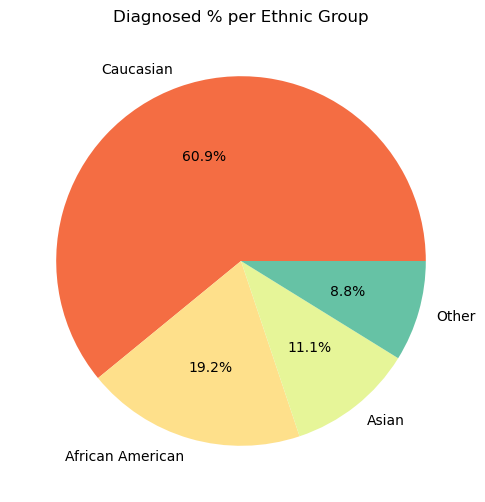

In [44]:
# Plotting the Pie Chart
colors = sns.color_palette("Spectral", len(diagnosed_percentage))
plt.figure(figsize=(10,6))
plt.pie(diagnosed_percentage, labels=diagnosed_percentage.index, autopct='%1.1f%%', colors=colors)
plt.title('Diagnosed % per Ethnic Group')
plt.show()

 - As per the illustration 61% of diagnosed cases represents Caucasian Ethnic Group.
 - Second largest ethnic group representation is 19% by African Americans.

* Diagnosed cases by Education Level

In [5]:
# Mapping the education level groups
df['EducationLevel'] = df['EducationLevel'].map({
    0: 'None',
    1: 'High School',
    2: 'Bachelors',
    3: 'Higher'
})

In [9]:
# Filter the diagnosed cases
diagnosed_df = df[df['Diagnosis'] == 1]

In [10]:
# Count the number of diagnosed cases per ethnic group
diagnosed_edu_counts = diagnosed_df['EducationLevel'].value_counts()

# Calculate percentage
diagnosed_edu_percentage = diagnosed_edu_counts / diagnosed_edu_counts.sum() * 100

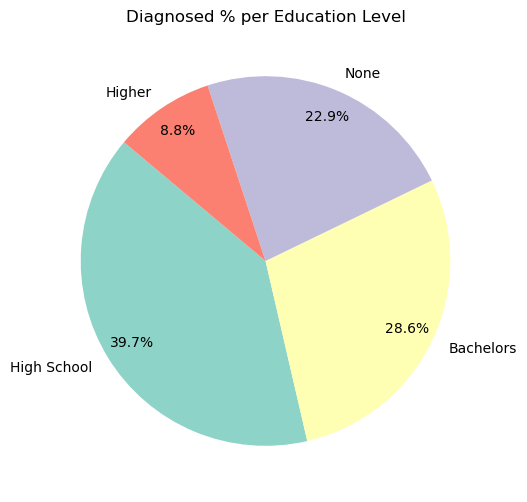

In [11]:
# Plotting the Pie Chart
colors = sns.color_palette("Set3", len(diagnosed_edu_percentage))
plt.figure(figsize=(10, 6))
plt.pie(diagnosed_edu_percentage, labels=diagnosed_edu_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Diagnosed % per Education Level')
plt.show()

 - Nearly 40% of the diagnosed population is corresponding to High School level education.
 - 29% of diagnosed individauls had Bachelor's level education.
 - It is observed that higher the education level, less likelihood for risk of Alzheimers.

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 5. Concluding Exploratory Data Analysis </b></div>

#### Dataset Characteristics

 - Choosen dataset of this project is fairy small with 2,149 records of individuals and 33 useful features. (Excluding PatientID & DoctorInCharge)
 - Data cleaning was deemed unnecessary as there are no missing values, duplicate records, or formatting errors present.
 - Non-binary features need to be scaled before modeling to ensure they contribute equally to the analysis.

#### Health profile observations

 - The patient population is predominantly elderly, with a roughly equal gender distribution
 - Despite the advanced age of the group, there is a relatively low prevalence of chronic conditions like cardiovascular disease, diabetes, hypertension, and depression.
 - Blood pressure readings show variability, with some individuals displaying higher readings, but the overall distribution remains within typical ranges.
 - Analysing the diagnosed cases by Ethnicity, 61% represents Caucasian Ethnic Group.
 - This could potentially be subject to the limited dataset. However, require further invesgation.
 - Also, 40% of the diagnosed population only had High School level education.
 - It is evident that higher the education level, less likely the risk of disease.

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 6. Statistical Binary Classification Models </b></div>

### Defining Model Features and Target Variables

In [8]:
features = df.drop(['Diagnosis'], axis=1)
target = df['Diagnosis']

In [9]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

### Standardizing features
* Scaling features to have a mean of 0 and a standard deviation of 1.
* Ensure that each feature contributes equally to a algorythm and improves the convergence speed and accuracy of the model.

In [10]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Test And Train Data Split
* 30% of the data will be used for testing, and the remaining 70% will be used for training

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

## Method 1: Logistic Regression

In [12]:
log = LogisticRegression()
log.fit(X_train,y_train)
pred_log = log.predict(X_test)

In [13]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.79      0.70      0.74       244

    accuracy                           0.82       645
   macro avg       0.81      0.79      0.80       645
weighted avg       0.81      0.82      0.81       645



* Logistic Regression Accuracy Score = 82%

In [13]:
print(confusion_matrix(y_test,pred_log))

[[355  46]
 [ 73 171]]


#### Logistic Regression Insights:

 - The model correctly predicted 355 True Negatives with 171 True Positives.
 - However, 73 instances were predicted negative, where they were actually positive.
 - The model has a reasonably good precision 79%, meaning it is fairly reliable when it predicts a positive case.
 - The model accuracy score  of 0.82 implies that the model correctly classified 82% of the instances.
 - This Model is not recommended for Alzheimer's Disease prediction given the moderately high False Positives & False Negatives.   
 - We may need to examine other models where we can improve recall rate.

## Method 2: Decision Tree Classifier

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.875968992248062

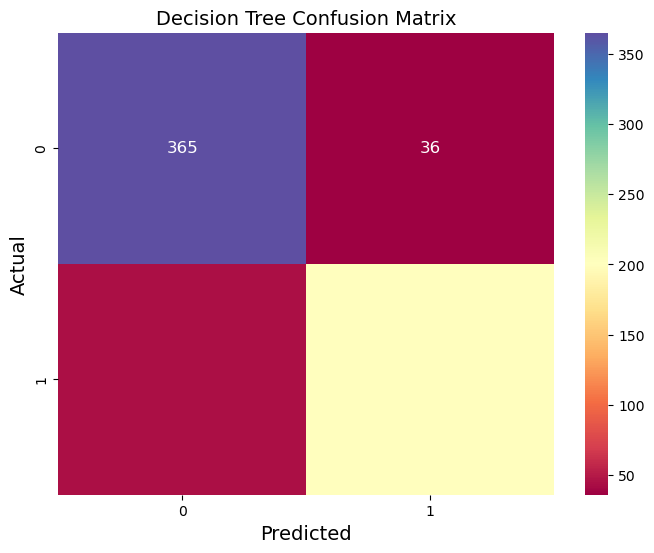

In [17]:
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 12})
plt.title('Decision Tree Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [18]:
print(confusion_matrix(y_test, pred))

[[365  36]
 [ 44 200]]


In [46]:
# Decision Tree Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       401
           1       0.87      0.82      0.84       244

    accuracy                           0.88       645
   macro avg       0.88      0.87      0.88       645
weighted avg       0.88      0.88      0.88       645



#### Decision Tree Classifier Insights:

 - The model correctly predicted 200 True Positives and 365 True Negatives.
 - Only 44 instances were predicted negative, where they were actually positive.
 - The F1-scores also suggest that the model is slightly more effective in identifying class 0 (negative) compared to class 1 (positive).
 - The model has a balanced precision and recall across both classes, indicating good overall performance.
 - The model accuracy score  of 0.88 implies that the model correctly classified 88% of the instances.

## Method 3: Random Forest Classifier

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)

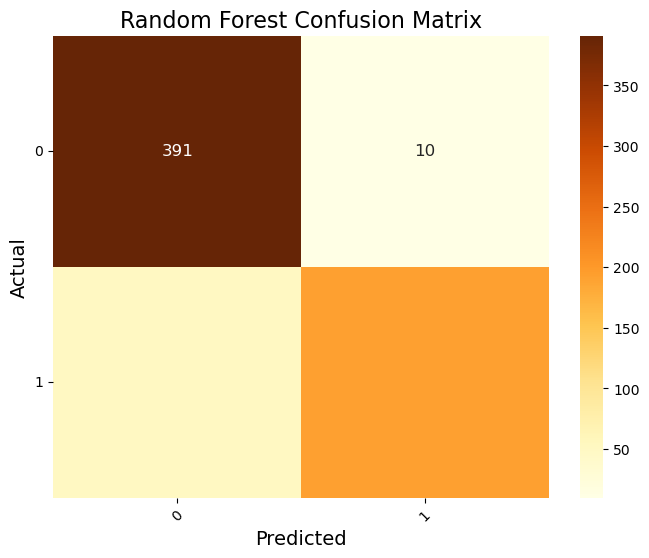

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 12})
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [21]:
print(confusion_matrix(y_test, y_pred))

[[391  10]
 [ 51 193]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       401
           1       0.95      0.79      0.86       244

    accuracy                           0.91       645
   macro avg       0.92      0.88      0.90       645
weighted avg       0.91      0.91      0.90       645



### Random Forest Classifier Insights:

##### Confusion Matrix
* The model correctly predicted 391 Ture Negatives and 193 True Positives.
* False Negative was 51. These are incorrectly predicted as negative instances that were actually positive.
* The Model is very precise, with few false positives, and it has a high overall accuracy. 

##### Accuracy Score = 0.91
* Indicates that 91% of the total instances are correctly classified.

##### Precision vs. Recall
* For class 0 (negative), recall is very high (0.98)
  - meaning most actual true negative instances are identified, but precision is slightly lower (0.88).
    
* For class 1 (positive), precision is very high (0.95)
  - recall is significantly lower (0.79), indicating that most predictions of true positives are correct.
  - however, a notable portion of actual true positive instances are missed.

##### F1-scores
* reflect a good balance between precision and recall.
* but the lower F1-score for positives (0.86) suggests the model could benefit from improvements in recall for positive instances.

##### Performance Summary
* Overall, the Random Forest classifier shows strong performance, particularly in terms of accuracy and precision.
* However, we'll need to further fine tune this model to improve missed positive instances.

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 7. Method Limitations </b></div>

“A model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.” (scikit-learn.org, n.d.).

Ravanshad (2018) also highlights that “random forests are biased in favor of categorical variables”. With Sweetviz EDA, we have learned our dataset contains 19 categorical columns

 Hence, our RF model performance is subject to data bias than Gradient Boosting methods.


<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family: 'Helvetica', Arial, sans-serif; background: linear-gradient(to right, lightyellow, lightcoral); overflow:hidden"><b> 8. Project Conclusion </b></div>

* Our comprehensive literature review on predictive modelling in healthcare along with modelling results has attested that a model made up of multiple decision trees has greater predictive accuracy than single-tree models.
  
* This warrants a robust and novel approach in the early identification of individuals at risk for Alzheimer's Disease.
* 
Even though random forest model accuracy is 91%, I have identified below techniques that could further improve model performance.* 

Advanced ensemble methods such as Gradient Boosting and XGBoost could be combined with Random Forest to create a more efficient mo
  
* el. Research by González-Recio et al. (2013) explains Gradient Boosting “showed similar or higher accuracy than other methods, such as Bayes A or Bayesian LA. SO”
Further with upskilling my Python skills, I aim to adopt k-fold cross-validation to ensure the model's performance is consistent across different data subsets and Grid Search to find the optimal parameers.

ers.
